In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Anantapur']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
0,0,14.08,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.19,0.07,0.18,...,0.17,8.89,0.51,15.24,0.066779,0.035485,0.203906,0.183342,-0.083973,G.Nut
1,1,14.09,77.69,Anantapur,Penukonda,Gonipeta,Redsoil,8.40,0.33,0.31,...,0.57,3.24,0.44,6.90,0.074064,0.039668,0.211340,0.210912,-0.095396,G.Nut
2,2,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,7.10,0.11,0.17,...,0.19,5.54,0.42,8.34,0.074064,0.039668,0.211340,0.210912,-0.095396,G.Nut
3,3,14.10,77.70,Anantapur,Penukonda,Gonipeta,Sandi soil,8.30,0.21,0.20,...,0.21,1.79,0.67,4.17,0.079518,0.041296,0.211175,0.220463,-0.099287,Horsegram
4,4,14.09,77.69,Anantapur,Penukonda,Gonipeta,Mixed soil,6.40,0.06,0.22,...,0.22,22.26,0.45,9.20,0.074064,0.039668,0.211340,0.210912,-0.095396,Horsegram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,7.651929,0.192857,0.289500,6.512429,80.771429,1725.871429,206.078571,9.862571,0.404643,0.469214,5.762143,0.661286,8.165786,0.266729
std,0.998730,0.236054,0.185656,11.774011,41.004183,992.319243,191.302768,20.594145,0.407398,0.346146,4.518472,0.323007,5.464037,0.130379
min,5.200000,0.030000,0.060000,1.180000,23.000000,166.000000,19.000000,1.060000,0.100000,0.150000,0.790000,0.200000,1.630000,0.158366
25%,6.837500,0.080000,0.177500,2.140000,53.750000,823.750000,85.500000,2.800000,0.210000,0.250000,2.540000,0.457500,4.025000,0.186506
50%,8.150000,0.130000,0.230000,3.615000,68.500000,1511.000000,146.000000,3.930000,0.300000,0.330000,4.290000,0.560000,7.020000,0.217602
75%,8.385000,0.200000,0.360000,7.595000,97.500000,2651.000000,254.500000,6.360000,0.460000,0.547500,7.892500,0.780000,10.340000,0.251557
max,9.020000,1.610000,1.410000,132.060000,265.000000,4097.000000,1179.000000,181.160000,3.390000,2.380000,27.920000,1.920000,29.670000,0.636602


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Mixed soil', 'Redsoil', 'Sandi soil', 'Red soil', 'Black Soil',
       'Sandy soil', 'RED', 'BLACK'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Redsoil', 'RED', 'Red soil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace('BLACK', 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Sandi soil', 'Sandy soil'], 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Mixed soil', 'Mixed Soil')
df.SoilType.unique()

array(['Mixed Soil', 'Red Soil', 'Sandy Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 112, 'Mixed Soil': 12, 'Black Soil': 10, 'Sandy Soil': 6}

<BarContainer object of 4 artists>

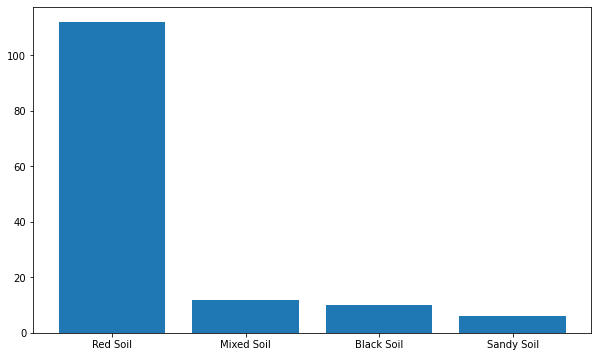

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['G.Nut', 'Horsegram', 'jowar', 'cotton', 'GROUND NUT', 'SUNFLOWER',
       'PADDY', 'TAMATO'], dtype=object)

In [14]:
df['Crop'].value_counts()

G.Nut         102
Horsegram      16
GROUND NUT     14
TAMATO          3
PADDY           2
jowar           1
cotton          1
SUNFLOWER       1
Name: Crop, dtype: int64

GroundNut    116
HorseGram     16
Tomato         3
Paddy          2
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

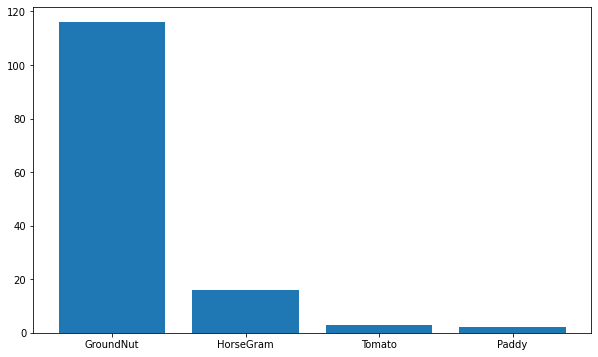

In [15]:
df['Crop'] = df['Crop'].replace(['G.Nut', 'GROUND NUT'], 'GroundNut')
df['Crop'] = df['Crop'].replace(['Horsegram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['TAMATO'], 'Tomato')
df['Crop'] = df['Crop'].replace(['PADDY'], 'Paddy')
df = df[(df['Crop'] != 'jowar') & (df['Crop'] != 'cotton') & (df['Crop'] != 'SUNFLOWER')]
print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'Tomato') & (df["Crop"] != 'Paddy')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.324521,0.246057,0.096174,0.270055,0.738869,0.333925,0.181708,0.128388,0.445603,-0.384213,0.163669,-0.604875,0.058573
EC,0.324521,1.000000,0.353826,0.536092,0.327708,0.382661,0.686467,0.917043,0.265468,0.445855,0.133792,0.346147,-0.144486,-0.003703
OC,0.246057,0.353826,1.000000,0.294536,0.533999,0.275270,0.583832,0.309083,0.380516,0.627248,0.203830,0.454423,-0.048781,0.101347
P,0.096174,0.536092,0.294536,1.000000,0.468772,0.110360,0.480357,0.704298,0.265371,0.299007,0.309679,0.349615,-0.016899,0.060410
K,0.270055,0.327708,0.533999,0.468772,1.000000,0.210341,0.500043,0.342663,0.225943,0.534825,0.183104,0.420192,-0.122099,0.171982
Ca,0.738869,0.382661,0.275270,0.110360,0.210341,1.000000,0.405896,0.254760,0.009658,0.352852,-0.186718,0.375051,-0.453159,-0.077203
Mg,0.333925,0.686467,0.583832,0.480357,0.500043,0.405896,1.000000,0.700722,0.209486,0.625129,0.259137,0.563011,-0.199968,-0.022548
S,0.181708,0.917043,0.309083,0.704298,0.342663,0.254760,0.700722,1.000000,0.177975,0.405801,0.276201,0.361188,-0.057399,-0.011738
Zn,0.128388,0.265468,0.380516,0.265371,0.225943,0.009658,0.209486,0.177975,1.000000,0.379540,0.045797,0.051484,0.034093,0.331293
B,0.445603,0.445855,0.627248,0.299007,0.534825,0.352852,0.625129,0.405801,0.379540,1.000000,0.058007,0.405252,-0.284042,0.181913


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['P', 'K', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'Zn', 'Fe', 'Mn', 'GCI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
X = X.values
y = y.values
print(type(X[0]))

     pH    EC    OC   Zn    Fe     Mn       GCI  Black Soil  Mixed Soil  \
0  6.19  0.07  0.18  0.3  8.89  15.24  0.183342           0           1   

   Red Soil  Sandy Soil  
0         0           0  
<class 'numpy.ndarray'>


In [23]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
print(X[0])
X[:,0:7] = sc1.fit_transform(X[:,0:7])
print(X[0])

[ 6.19        0.07        0.18        0.3         8.89       15.24
  0.18334152  0.          1.          0.          0.        ]
[-1.4324609  -0.52831773 -0.58362014 -0.27682486  0.6931062   1.3388061
 -0.62821718  0.          1.          0.          0.        ]


In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [49]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [50]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [51]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8484848484848485


In [52]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


# Decision Tree Classifier

In [53]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [55]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8181818181818182


In [56]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 91.89 %
Standard Deviation: 6.05 %


# Random Forest Classifier

In [57]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [59]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8787878787878788


In [60]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


In [61]:
# pickle.dump(clf3, open('Anantapur_model.pkl', 'wb'))
# pickle.dump(sc1, open('Anantapur_scaler.pkl', 'wb'))
# HERE

# XGBoost

In [62]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [63]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [64]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.98989898989899
Testing Accuracy:  0.8484848484848485


In [65]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [66]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.78 %
Standard Deviation: 8.19 %


# Multi-layer Perceptron Classifier

In [67]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [68]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [69]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8888888888888888
Testing Accuracy:  0.8787878787878788


In [70]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)

In [71]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.89 %
Standard Deviation: 3.96 %


# Catboost

In [72]:
# Catboost

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.3984355	total: 1ms	remaining: 99.3ms
1:	learn: 0.3413762	total: 2.23ms	remaining: 109ms
2:	learn: 0.3153823	total: 3.51ms	remaining: 114ms
3:	learn: 0.2976219	total: 4.5ms	remaining: 108ms
4:	learn: 0.2594956	total: 5.49ms	remaining: 104ms
5:	learn: 0.2430148	total: 6.5ms	remaining: 102ms
6:	learn: 0.2299218	total: 7.43ms	remaining: 98.7ms
7:	learn: 0.2249800	total: 8.47ms	remaining: 97.4ms
8:	learn: 0.2216980	total: 9.48ms	remaining: 95.9ms
9:	learn: 0.1976299	total: 10.5ms	remaining: 94.6ms
10:	learn: 0.1866396	total: 11.7ms	remaining: 94.4ms
11:	learn: 0.1589726	total: 12.7ms	remaining: 93.3ms
12:	learn: 0.1551063	total: 13.7ms	remaining: 91.7ms
13:	learn: 0.1424136	total: 14.6ms	remaining: 89.5ms
14:	learn: 0.1299728	total: 15.3ms	remaining: 86.5ms
15:	learn: 0.1278996	total: 16ms	remaining: 83.9ms
16:	learn: 0.1245051	total: 16.7ms	remaining: 81.7ms
17:	learn: 0.1209864	total: 17.4ms	remaining: 79.5ms
18:	learn: 0.1151173	total: 18.2ms	remaining: 77.4ms
19:	learn: 0.11

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.4234518625
bestIteration = 86

Training on fold [1/5]

bestTest = 0.4167710548
bestIteration = 93

Training on fold [2/5]

bestTest = 0.332945946
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3183695993
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3330666118
bestIteration = 98



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6815191	test: 0.6822494	best: 0.6822494 (0)	total: 562us	remaining: 562ms
1:	learn: 0.6661404	test: 0.6706217	best: 0.6706217 (1)	total: 1.44ms	remaining: 721ms
2:	learn: 0.6536851	test: 0.6622513	best: 0.6622513 (2)	total: 2.07ms	remaining: 688ms
3:	learn: 0.6422149	test: 0.6537683	best: 0.6537683 (3)	total: 2.66ms	remaining: 663ms
4:	learn: 0.6303705	test: 0.6464995	best: 0.6464995 (4)	total: 4.58ms	remaining: 911ms
5:	learn: 0.6169552	test: 0.6367272	best: 0.6367272 (5)	total: 8.22ms	remaining: 1.36s
6:	learn: 0.6073672	test: 0.6290444	best: 0.6290444 (6)	total: 12.6ms	remaining: 1.78s
7:	learn: 0.5967340	test: 0.6225328	best: 0.6225328 (7)	total: 16.9ms	remaining: 2.09s
8:	learn: 0.5873452	test: 0.6164145	best: 0.6164145 (8)	total: 21.1ms	remaining: 2.32s
9:	learn: 0.5772707	test: 0.6095444	best: 0.6095444 (9)	total: 23ms	remaining: 2.28s
10:	learn: 0.5679979	test: 0.6031118	best: 0.6031118 (10)	total: 24.5ms	remaining: 2.2s
11:	learn: 0.5593079	test: 0.5970855	best: 0.

210:	learn: 0.1510219	test: 0.4689490	best: 0.4685770 (175)	total: 154ms	remaining: 577ms
211:	learn: 0.1502966	test: 0.4691953	best: 0.4685770 (175)	total: 155ms	remaining: 576ms
212:	learn: 0.1496857	test: 0.4689488	best: 0.4685770 (175)	total: 155ms	remaining: 574ms
213:	learn: 0.1480898	test: 0.4679763	best: 0.4679763 (213)	total: 156ms	remaining: 573ms
214:	learn: 0.1477406	test: 0.4684217	best: 0.4679763 (213)	total: 157ms	remaining: 572ms
215:	learn: 0.1471062	test: 0.4683560	best: 0.4679763 (213)	total: 157ms	remaining: 571ms
216:	learn: 0.1469496	test: 0.4688848	best: 0.4679763 (213)	total: 158ms	remaining: 570ms
217:	learn: 0.1464907	test: 0.4682563	best: 0.4679763 (213)	total: 158ms	remaining: 568ms
218:	learn: 0.1451278	test: 0.4680019	best: 0.4679763 (213)	total: 159ms	remaining: 567ms
219:	learn: 0.1448203	test: 0.4680324	best: 0.4679763 (213)	total: 160ms	remaining: 566ms
220:	learn: 0.1443384	test: 0.4688864	best: 0.4679763 (213)	total: 160ms	remaining: 564ms
221:	learn

444:	learn: 0.0574125	test: 0.4806037	best: 0.4670683 (249)	total: 315ms	remaining: 393ms
445:	learn: 0.0572607	test: 0.4812372	best: 0.4670683 (249)	total: 316ms	remaining: 392ms
446:	learn: 0.0569548	test: 0.4817527	best: 0.4670683 (249)	total: 316ms	remaining: 391ms
447:	learn: 0.0568352	test: 0.4811797	best: 0.4670683 (249)	total: 317ms	remaining: 390ms
448:	learn: 0.0566620	test: 0.4815702	best: 0.4670683 (249)	total: 317ms	remaining: 389ms
449:	learn: 0.0565425	test: 0.4814390	best: 0.4670683 (249)	total: 318ms	remaining: 388ms
450:	learn: 0.0564175	test: 0.4819133	best: 0.4670683 (249)	total: 318ms	remaining: 387ms
451:	learn: 0.0563157	test: 0.4820216	best: 0.4670683 (249)	total: 319ms	remaining: 386ms
452:	learn: 0.0562678	test: 0.4821784	best: 0.4670683 (249)	total: 319ms	remaining: 385ms
453:	learn: 0.0560803	test: 0.4824769	best: 0.4670683 (249)	total: 320ms	remaining: 385ms
454:	learn: 0.0558438	test: 0.4819310	best: 0.4670683 (249)	total: 320ms	remaining: 384ms
455:	learn

645:	learn: 0.0348252	test: 0.5035723	best: 0.4670683 (249)	total: 476ms	remaining: 261ms
646:	learn: 0.0346827	test: 0.5035724	best: 0.4670683 (249)	total: 477ms	remaining: 260ms
647:	learn: 0.0345398	test: 0.5035765	best: 0.4670683 (249)	total: 478ms	remaining: 259ms
648:	learn: 0.0344460	test: 0.5032676	best: 0.4670683 (249)	total: 478ms	remaining: 259ms
649:	learn: 0.0343731	test: 0.5033356	best: 0.4670683 (249)	total: 480ms	remaining: 258ms
650:	learn: 0.0343262	test: 0.5036186	best: 0.4670683 (249)	total: 488ms	remaining: 261ms
651:	learn: 0.0342955	test: 0.5037390	best: 0.4670683 (249)	total: 493ms	remaining: 263ms
652:	learn: 0.0342251	test: 0.5034345	best: 0.4670683 (249)	total: 497ms	remaining: 264ms
653:	learn: 0.0341603	test: 0.5041616	best: 0.4670683 (249)	total: 499ms	remaining: 264ms
654:	learn: 0.0340805	test: 0.5046417	best: 0.4670683 (249)	total: 500ms	remaining: 264ms
655:	learn: 0.0340407	test: 0.5047416	best: 0.4670683 (249)	total: 502ms	remaining: 263ms
656:	learn

854:	learn: 0.0240098	test: 0.5289107	best: 0.4670683 (249)	total: 644ms	remaining: 109ms
855:	learn: 0.0239646	test: 0.5290535	best: 0.4670683 (249)	total: 645ms	remaining: 108ms
856:	learn: 0.0238915	test: 0.5293949	best: 0.4670683 (249)	total: 646ms	remaining: 108ms
857:	learn: 0.0238780	test: 0.5294003	best: 0.4670683 (249)	total: 652ms	remaining: 108ms
858:	learn: 0.0238616	test: 0.5295242	best: 0.4670683 (249)	total: 656ms	remaining: 108ms
859:	learn: 0.0237903	test: 0.5295614	best: 0.4670683 (249)	total: 661ms	remaining: 108ms
860:	learn: 0.0237531	test: 0.5302046	best: 0.4670683 (249)	total: 664ms	remaining: 107ms
861:	learn: 0.0237213	test: 0.5307077	best: 0.4670683 (249)	total: 666ms	remaining: 107ms
862:	learn: 0.0236986	test: 0.5306672	best: 0.4670683 (249)	total: 668ms	remaining: 106ms
863:	learn: 0.0236867	test: 0.5305725	best: 0.4670683 (249)	total: 670ms	remaining: 105ms
864:	learn: 0.0236637	test: 0.5307840	best: 0.4670683 (249)	total: 671ms	remaining: 105ms
865:	learn

91:	learn: 0.1000002	test: 0.4822523	best: 0.4696794 (29)	total: 47.8ms	remaining: 472ms
92:	learn: 0.0986723	test: 0.4807081	best: 0.4696794 (29)	total: 48.5ms	remaining: 473ms
93:	learn: 0.0970395	test: 0.4818588	best: 0.4696794 (29)	total: 49.1ms	remaining: 473ms
94:	learn: 0.0957266	test: 0.4839404	best: 0.4696794 (29)	total: 49.5ms	remaining: 472ms
95:	learn: 0.0934412	test: 0.4835936	best: 0.4696794 (29)	total: 50ms	remaining: 471ms
96:	learn: 0.0928079	test: 0.4851902	best: 0.4696794 (29)	total: 50.6ms	remaining: 471ms
97:	learn: 0.0918397	test: 0.4846785	best: 0.4696794 (29)	total: 51.1ms	remaining: 470ms
98:	learn: 0.0911616	test: 0.4870661	best: 0.4696794 (29)	total: 51.6ms	remaining: 470ms
99:	learn: 0.0903485	test: 0.4882987	best: 0.4696794 (29)	total: 52.1ms	remaining: 469ms
100:	learn: 0.0897506	test: 0.4872122	best: 0.4696794 (29)	total: 52.7ms	remaining: 469ms
101:	learn: 0.0886219	test: 0.4885520	best: 0.4696794 (29)	total: 53.2ms	remaining: 468ms
102:	learn: 0.0873684

313:	learn: 0.0191735	test: 0.5704901	best: 0.4696794 (29)	total: 212ms	remaining: 463ms
314:	learn: 0.0191142	test: 0.5715322	best: 0.4696794 (29)	total: 213ms	remaining: 464ms
315:	learn: 0.0190580	test: 0.5714486	best: 0.4696794 (29)	total: 215ms	remaining: 465ms
316:	learn: 0.0188917	test: 0.5715466	best: 0.4696794 (29)	total: 216ms	remaining: 465ms
317:	learn: 0.0187674	test: 0.5718900	best: 0.4696794 (29)	total: 217ms	remaining: 465ms
318:	learn: 0.0186057	test: 0.5728754	best: 0.4696794 (29)	total: 218ms	remaining: 466ms
319:	learn: 0.0185581	test: 0.5723835	best: 0.4696794 (29)	total: 219ms	remaining: 466ms
320:	learn: 0.0184789	test: 0.5733696	best: 0.4696794 (29)	total: 220ms	remaining: 466ms
321:	learn: 0.0184415	test: 0.5736407	best: 0.4696794 (29)	total: 221ms	remaining: 466ms
322:	learn: 0.0184256	test: 0.5742124	best: 0.4696794 (29)	total: 222ms	remaining: 465ms
323:	learn: 0.0183541	test: 0.5747713	best: 0.4696794 (29)	total: 223ms	remaining: 465ms
324:	learn: 0.0183060

472:	learn: 0.0109859	test: 0.6014091	best: 0.4696794 (29)	total: 374ms	remaining: 417ms
473:	learn: 0.0109722	test: 0.6019474	best: 0.4696794 (29)	total: 375ms	remaining: 416ms
474:	learn: 0.0109156	test: 0.6020839	best: 0.4696794 (29)	total: 375ms	remaining: 415ms
475:	learn: 0.0108695	test: 0.6031365	best: 0.4696794 (29)	total: 376ms	remaining: 414ms
476:	learn: 0.0108489	test: 0.6028651	best: 0.4696794 (29)	total: 377ms	remaining: 414ms
477:	learn: 0.0108279	test: 0.6031870	best: 0.4696794 (29)	total: 378ms	remaining: 413ms
478:	learn: 0.0108076	test: 0.6034157	best: 0.4696794 (29)	total: 379ms	remaining: 412ms
479:	learn: 0.0107700	test: 0.6032935	best: 0.4696794 (29)	total: 379ms	remaining: 411ms
480:	learn: 0.0107277	test: 0.6029754	best: 0.4696794 (29)	total: 380ms	remaining: 410ms
481:	learn: 0.0107074	test: 0.6031145	best: 0.4696794 (29)	total: 380ms	remaining: 409ms
482:	learn: 0.0106948	test: 0.6035115	best: 0.4696794 (29)	total: 381ms	remaining: 408ms
483:	learn: 0.0106419

725:	learn: 0.0065436	test: 0.6335584	best: 0.4696794 (29)	total: 535ms	remaining: 202ms
726:	learn: 0.0065375	test: 0.6336581	best: 0.4696794 (29)	total: 536ms	remaining: 201ms
727:	learn: 0.0065269	test: 0.6337400	best: 0.4696794 (29)	total: 537ms	remaining: 200ms
728:	learn: 0.0065211	test: 0.6337880	best: 0.4696794 (29)	total: 537ms	remaining: 200ms
729:	learn: 0.0065156	test: 0.6338413	best: 0.4696794 (29)	total: 538ms	remaining: 199ms
730:	learn: 0.0065099	test: 0.6340695	best: 0.4696794 (29)	total: 538ms	remaining: 198ms
731:	learn: 0.0065041	test: 0.6343323	best: 0.4696794 (29)	total: 539ms	remaining: 197ms
732:	learn: 0.0064958	test: 0.6347136	best: 0.4696794 (29)	total: 539ms	remaining: 196ms
733:	learn: 0.0064870	test: 0.6351626	best: 0.4696794 (29)	total: 540ms	remaining: 196ms
734:	learn: 0.0064773	test: 0.6354640	best: 0.4696794 (29)	total: 540ms	remaining: 195ms
735:	learn: 0.0064701	test: 0.6356672	best: 0.4696794 (29)	total: 540ms	remaining: 194ms
736:	learn: 0.0064535

0:	learn: 0.6840887	test: 0.6852024	best: 0.6852024 (0)	total: 4.27ms	remaining: 4.27s
1:	learn: 0.6741579	test: 0.6792053	best: 0.6792053 (1)	total: 8.04ms	remaining: 4.01s
2:	learn: 0.6642368	test: 0.6706596	best: 0.6706596 (2)	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6511423	test: 0.6620272	best: 0.6620272 (3)	total: 15ms	remaining: 3.74s
4:	learn: 0.6386901	test: 0.6557004	best: 0.6557004 (4)	total: 18.5ms	remaining: 3.67s
5:	learn: 0.6310498	test: 0.6501550	best: 0.6501550 (5)	total: 22.1ms	remaining: 3.65s
6:	learn: 0.6208406	test: 0.6436373	best: 0.6436373 (6)	total: 25.9ms	remaining: 3.67s
7:	learn: 0.6127315	test: 0.6386409	best: 0.6386409 (7)	total: 30.5ms	remaining: 3.78s
8:	learn: 0.6046113	test: 0.6353064	best: 0.6353064 (8)	total: 33.7ms	remaining: 3.71s
9:	learn: 0.5979247	test: 0.6321251	best: 0.6321251 (9)	total: 36ms	remaining: 3.57s
10:	learn: 0.5887642	test: 0.6257361	best: 0.6257361 (10)	total: 39.1ms	remaining: 3.51s
11:	learn: 0.5788904	test: 0.6175521	best: 0.

116:	learn: 0.2413819	test: 0.4704294	best: 0.4686356 (113)	total: 172ms	remaining: 1.3s
117:	learn: 0.2402129	test: 0.4710590	best: 0.4686356 (113)	total: 174ms	remaining: 1.3s
118:	learn: 0.2389898	test: 0.4715069	best: 0.4686356 (113)	total: 175ms	remaining: 1.3s
119:	learn: 0.2367505	test: 0.4725417	best: 0.4686356 (113)	total: 177ms	remaining: 1.29s
120:	learn: 0.2359172	test: 0.4720597	best: 0.4686356 (113)	total: 178ms	remaining: 1.29s
121:	learn: 0.2346942	test: 0.4715646	best: 0.4686356 (113)	total: 179ms	remaining: 1.29s
122:	learn: 0.2320486	test: 0.4697050	best: 0.4686356 (113)	total: 180ms	remaining: 1.28s
123:	learn: 0.2308011	test: 0.4686758	best: 0.4686356 (113)	total: 181ms	remaining: 1.28s
124:	learn: 0.2299263	test: 0.4680805	best: 0.4680805 (124)	total: 182ms	remaining: 1.27s
125:	learn: 0.2275257	test: 0.4674923	best: 0.4674923 (125)	total: 183ms	remaining: 1.27s
126:	learn: 0.2267718	test: 0.4674312	best: 0.4674312 (126)	total: 184ms	remaining: 1.26s
127:	learn: 0

294:	learn: 0.0823239	test: 0.4923383	best: 0.4599299 (166)	total: 344ms	remaining: 821ms
295:	learn: 0.0820773	test: 0.4928662	best: 0.4599299 (166)	total: 345ms	remaining: 820ms
296:	learn: 0.0818211	test: 0.4935084	best: 0.4599299 (166)	total: 346ms	remaining: 818ms
297:	learn: 0.0815873	test: 0.4936515	best: 0.4599299 (166)	total: 347ms	remaining: 817ms
298:	learn: 0.0812046	test: 0.4940995	best: 0.4599299 (166)	total: 348ms	remaining: 816ms
299:	learn: 0.0805620	test: 0.4950840	best: 0.4599299 (166)	total: 349ms	remaining: 814ms
300:	learn: 0.0800382	test: 0.4958041	best: 0.4599299 (166)	total: 350ms	remaining: 812ms
301:	learn: 0.0795850	test: 0.4957591	best: 0.4599299 (166)	total: 351ms	remaining: 811ms
302:	learn: 0.0791442	test: 0.4955398	best: 0.4599299 (166)	total: 352ms	remaining: 809ms
303:	learn: 0.0787628	test: 0.4956432	best: 0.4599299 (166)	total: 352ms	remaining: 807ms
304:	learn: 0.0785530	test: 0.4954911	best: 0.4599299 (166)	total: 354ms	remaining: 806ms
305:	learn

392:	learn: 0.0523073	test: 0.5165967	best: 0.4599299 (166)	total: 510ms	remaining: 788ms
393:	learn: 0.0521577	test: 0.5170024	best: 0.4599299 (166)	total: 513ms	remaining: 788ms
394:	learn: 0.0519949	test: 0.5174069	best: 0.4599299 (166)	total: 514ms	remaining: 788ms
395:	learn: 0.0519127	test: 0.5174781	best: 0.4599299 (166)	total: 516ms	remaining: 787ms
396:	learn: 0.0517056	test: 0.5181637	best: 0.4599299 (166)	total: 517ms	remaining: 786ms
397:	learn: 0.0516061	test: 0.5184089	best: 0.4599299 (166)	total: 518ms	remaining: 784ms
398:	learn: 0.0513586	test: 0.5195944	best: 0.4599299 (166)	total: 520ms	remaining: 783ms
399:	learn: 0.0510565	test: 0.5198415	best: 0.4599299 (166)	total: 521ms	remaining: 781ms
400:	learn: 0.0509169	test: 0.5205711	best: 0.4599299 (166)	total: 522ms	remaining: 779ms
401:	learn: 0.0507853	test: 0.5213492	best: 0.4599299 (166)	total: 523ms	remaining: 778ms
402:	learn: 0.0507121	test: 0.5217816	best: 0.4599299 (166)	total: 526ms	remaining: 779ms
403:	learn

493:	learn: 0.0374190	test: 0.5405596	best: 0.4599299 (166)	total: 678ms	remaining: 695ms
494:	learn: 0.0372395	test: 0.5408085	best: 0.4599299 (166)	total: 681ms	remaining: 694ms
495:	learn: 0.0371456	test: 0.5411741	best: 0.4599299 (166)	total: 682ms	remaining: 693ms
496:	learn: 0.0370458	test: 0.5415468	best: 0.4599299 (166)	total: 684ms	remaining: 693ms
497:	learn: 0.0369414	test: 0.5410156	best: 0.4599299 (166)	total: 686ms	remaining: 691ms
498:	learn: 0.0367775	test: 0.5412408	best: 0.4599299 (166)	total: 687ms	remaining: 690ms
499:	learn: 0.0366693	test: 0.5409337	best: 0.4599299 (166)	total: 689ms	remaining: 689ms
500:	learn: 0.0366213	test: 0.5411591	best: 0.4599299 (166)	total: 690ms	remaining: 688ms
501:	learn: 0.0365345	test: 0.5416186	best: 0.4599299 (166)	total: 692ms	remaining: 686ms
502:	learn: 0.0364525	test: 0.5422342	best: 0.4599299 (166)	total: 693ms	remaining: 685ms
503:	learn: 0.0364039	test: 0.5424947	best: 0.4599299 (166)	total: 694ms	remaining: 683ms
504:	learn

633:	learn: 0.0254627	test: 0.5631270	best: 0.4599299 (166)	total: 850ms	remaining: 491ms
634:	learn: 0.0253677	test: 0.5633016	best: 0.4599299 (166)	total: 851ms	remaining: 489ms
635:	learn: 0.0253158	test: 0.5630110	best: 0.4599299 (166)	total: 852ms	remaining: 488ms
636:	learn: 0.0252660	test: 0.5630841	best: 0.4599299 (166)	total: 853ms	remaining: 486ms
637:	learn: 0.0251813	test: 0.5632528	best: 0.4599299 (166)	total: 854ms	remaining: 485ms
638:	learn: 0.0251274	test: 0.5635344	best: 0.4599299 (166)	total: 855ms	remaining: 483ms
639:	learn: 0.0250997	test: 0.5636524	best: 0.4599299 (166)	total: 856ms	remaining: 481ms
640:	learn: 0.0250504	test: 0.5640264	best: 0.4599299 (166)	total: 857ms	remaining: 480ms
641:	learn: 0.0250262	test: 0.5640322	best: 0.4599299 (166)	total: 858ms	remaining: 478ms
642:	learn: 0.0249777	test: 0.5639324	best: 0.4599299 (166)	total: 859ms	remaining: 477ms
643:	learn: 0.0248898	test: 0.5638880	best: 0.4599299 (166)	total: 860ms	remaining: 475ms
644:	learn

787:	learn: 0.0187164	test: 0.5845358	best: 0.4599299 (166)	total: 1.02s	remaining: 274ms
788:	learn: 0.0186977	test: 0.5847898	best: 0.4599299 (166)	total: 1.02s	remaining: 273ms
789:	learn: 0.0186513	test: 0.5847887	best: 0.4599299 (166)	total: 1.02s	remaining: 272ms
790:	learn: 0.0186306	test: 0.5849380	best: 0.4599299 (166)	total: 1.03s	remaining: 273ms
791:	learn: 0.0185773	test: 0.5850872	best: 0.4599299 (166)	total: 1.04s	remaining: 273ms
792:	learn: 0.0185295	test: 0.5852972	best: 0.4599299 (166)	total: 1.04s	remaining: 273ms
793:	learn: 0.0185111	test: 0.5852954	best: 0.4599299 (166)	total: 1.05s	remaining: 272ms
794:	learn: 0.0184898	test: 0.5850786	best: 0.4599299 (166)	total: 1.05s	remaining: 271ms
795:	learn: 0.0184390	test: 0.5851719	best: 0.4599299 (166)	total: 1.05s	remaining: 269ms
796:	learn: 0.0183862	test: 0.5853202	best: 0.4599299 (166)	total: 1.05s	remaining: 268ms
797:	learn: 0.0183353	test: 0.5854331	best: 0.4599299 (166)	total: 1.05s	remaining: 267ms
798:	learn

31:	learn: 0.2611280	test: 0.4796728	best: 0.4763591 (27)	total: 30.2ms	remaining: 914ms
32:	learn: 0.2493583	test: 0.4721549	best: 0.4721549 (32)	total: 31.4ms	remaining: 920ms
33:	learn: 0.2435861	test: 0.4665519	best: 0.4665519 (33)	total: 32.4ms	remaining: 920ms
34:	learn: 0.2383708	test: 0.4655705	best: 0.4655705 (34)	total: 33.4ms	remaining: 921ms
35:	learn: 0.2341675	test: 0.4668190	best: 0.4655705 (34)	total: 34.3ms	remaining: 918ms
36:	learn: 0.2298900	test: 0.4684975	best: 0.4655705 (34)	total: 35.2ms	remaining: 916ms
37:	learn: 0.2255925	test: 0.4686705	best: 0.4655705 (34)	total: 36.2ms	remaining: 915ms
38:	learn: 0.2213853	test: 0.4682858	best: 0.4655705 (34)	total: 37.1ms	remaining: 913ms
39:	learn: 0.2174526	test: 0.4698632	best: 0.4655705 (34)	total: 37.9ms	remaining: 910ms
40:	learn: 0.2129736	test: 0.4682127	best: 0.4655705 (34)	total: 38.8ms	remaining: 907ms
41:	learn: 0.2098557	test: 0.4683174	best: 0.4655705 (34)	total: 39.7ms	remaining: 905ms
42:	learn: 0.2058316	

200:	learn: 0.0236918	test: 0.5513892	best: 0.4591291 (58)	total: 212ms	remaining: 844ms
201:	learn: 0.0235591	test: 0.5517287	best: 0.4591291 (58)	total: 213ms	remaining: 843ms
202:	learn: 0.0234799	test: 0.5514355	best: 0.4591291 (58)	total: 214ms	remaining: 841ms
203:	learn: 0.0232910	test: 0.5527395	best: 0.4591291 (58)	total: 221ms	remaining: 861ms
204:	learn: 0.0230599	test: 0.5534016	best: 0.4591291 (58)	total: 230ms	remaining: 893ms
205:	learn: 0.0229796	test: 0.5554404	best: 0.4591291 (58)	total: 236ms	remaining: 910ms
206:	learn: 0.0228927	test: 0.5567304	best: 0.4591291 (58)	total: 238ms	remaining: 913ms
207:	learn: 0.0227376	test: 0.5577718	best: 0.4591291 (58)	total: 240ms	remaining: 915ms
208:	learn: 0.0226873	test: 0.5578601	best: 0.4591291 (58)	total: 243ms	remaining: 918ms
209:	learn: 0.0225999	test: 0.5581064	best: 0.4591291 (58)	total: 244ms	remaining: 919ms
210:	learn: 0.0225248	test: 0.5581275	best: 0.4591291 (58)	total: 246ms	remaining: 919ms
211:	learn: 0.0223462

297:	learn: 0.0137778	test: 0.5906249	best: 0.4591291 (58)	total: 374ms	remaining: 882ms
298:	learn: 0.0136974	test: 0.5907496	best: 0.4591291 (58)	total: 375ms	remaining: 880ms
299:	learn: 0.0136616	test: 0.5914222	best: 0.4591291 (58)	total: 376ms	remaining: 878ms
300:	learn: 0.0136378	test: 0.5913501	best: 0.4591291 (58)	total: 377ms	remaining: 876ms
301:	learn: 0.0135624	test: 0.5917386	best: 0.4591291 (58)	total: 378ms	remaining: 874ms
302:	learn: 0.0135275	test: 0.5916041	best: 0.4591291 (58)	total: 379ms	remaining: 873ms
303:	learn: 0.0134798	test: 0.5916635	best: 0.4591291 (58)	total: 381ms	remaining: 873ms
304:	learn: 0.0134226	test: 0.5925480	best: 0.4591291 (58)	total: 382ms	remaining: 871ms
305:	learn: 0.0133898	test: 0.5930947	best: 0.4591291 (58)	total: 383ms	remaining: 870ms
306:	learn: 0.0133575	test: 0.5934699	best: 0.4591291 (58)	total: 384ms	remaining: 868ms
307:	learn: 0.0133194	test: 0.5940928	best: 0.4591291 (58)	total: 385ms	remaining: 866ms
308:	learn: 0.0132381

414:	learn: 0.0089899	test: 0.6241722	best: 0.4591291 (58)	total: 559ms	remaining: 788ms
415:	learn: 0.0089674	test: 0.6243147	best: 0.4591291 (58)	total: 566ms	remaining: 794ms
416:	learn: 0.0089319	test: 0.6242776	best: 0.4591291 (58)	total: 568ms	remaining: 794ms
417:	learn: 0.0089095	test: 0.6247699	best: 0.4591291 (58)	total: 570ms	remaining: 793ms
418:	learn: 0.0088865	test: 0.6251816	best: 0.4591291 (58)	total: 571ms	remaining: 792ms
419:	learn: 0.0088765	test: 0.6250330	best: 0.4591291 (58)	total: 573ms	remaining: 792ms
420:	learn: 0.0088369	test: 0.6252974	best: 0.4591291 (58)	total: 575ms	remaining: 790ms
421:	learn: 0.0088029	test: 0.6255850	best: 0.4591291 (58)	total: 577ms	remaining: 790ms
422:	learn: 0.0087624	test: 0.6259921	best: 0.4591291 (58)	total: 579ms	remaining: 789ms
423:	learn: 0.0087456	test: 0.6259419	best: 0.4591291 (58)	total: 580ms	remaining: 788ms
424:	learn: 0.0087081	test: 0.6261949	best: 0.4591291 (58)	total: 581ms	remaining: 787ms
425:	learn: 0.0086901

595:	learn: 0.0056955	test: 0.6537156	best: 0.4591291 (58)	total: 739ms	remaining: 501ms
596:	learn: 0.0056754	test: 0.6540184	best: 0.4591291 (58)	total: 740ms	remaining: 499ms
597:	learn: 0.0056624	test: 0.6541513	best: 0.4591291 (58)	total: 741ms	remaining: 498ms
598:	learn: 0.0056565	test: 0.6543189	best: 0.4591291 (58)	total: 742ms	remaining: 497ms
599:	learn: 0.0056468	test: 0.6545087	best: 0.4591291 (58)	total: 743ms	remaining: 495ms
600:	learn: 0.0056322	test: 0.6546539	best: 0.4591291 (58)	total: 744ms	remaining: 494ms
601:	learn: 0.0056237	test: 0.6549521	best: 0.4591291 (58)	total: 750ms	remaining: 496ms
602:	learn: 0.0056099	test: 0.6549394	best: 0.4591291 (58)	total: 758ms	remaining: 499ms
603:	learn: 0.0055959	test: 0.6551574	best: 0.4591291 (58)	total: 764ms	remaining: 501ms
604:	learn: 0.0055863	test: 0.6552245	best: 0.4591291 (58)	total: 766ms	remaining: 500ms
605:	learn: 0.0055802	test: 0.6553698	best: 0.4591291 (58)	total: 769ms	remaining: 500ms
606:	learn: 0.0055668

757:	learn: 0.0043428	test: 0.6708262	best: 0.4591291 (58)	total: 910ms	remaining: 291ms
758:	learn: 0.0043360	test: 0.6709021	best: 0.4591291 (58)	total: 921ms	remaining: 292ms
759:	learn: 0.0043249	test: 0.6710678	best: 0.4591291 (58)	total: 922ms	remaining: 291ms
760:	learn: 0.0043216	test: 0.6712401	best: 0.4591291 (58)	total: 923ms	remaining: 290ms
761:	learn: 0.0043139	test: 0.6714110	best: 0.4591291 (58)	total: 924ms	remaining: 289ms
762:	learn: 0.0043065	test: 0.6714740	best: 0.4591291 (58)	total: 925ms	remaining: 287ms
763:	learn: 0.0043023	test: 0.6716219	best: 0.4591291 (58)	total: 926ms	remaining: 286ms
764:	learn: 0.0042965	test: 0.6715033	best: 0.4591291 (58)	total: 927ms	remaining: 285ms
765:	learn: 0.0042924	test: 0.6718566	best: 0.4591291 (58)	total: 928ms	remaining: 283ms
766:	learn: 0.0042877	test: 0.6719472	best: 0.4591291 (58)	total: 929ms	remaining: 282ms
767:	learn: 0.0042795	test: 0.6719437	best: 0.4591291 (58)	total: 930ms	remaining: 281ms
768:	learn: 0.0042704

929:	learn: 0.0034487	test: 0.6840672	best: 0.4591291 (58)	total: 1.08s	remaining: 81ms
930:	learn: 0.0034462	test: 0.6840417	best: 0.4591291 (58)	total: 1.08s	remaining: 79.9ms
931:	learn: 0.0034431	test: 0.6841551	best: 0.4591291 (58)	total: 1.08s	remaining: 78.7ms
932:	learn: 0.0034376	test: 0.6841792	best: 0.4591291 (58)	total: 1.08s	remaining: 77.5ms
933:	learn: 0.0034349	test: 0.6842805	best: 0.4591291 (58)	total: 1.08s	remaining: 76.4ms
934:	learn: 0.0034326	test: 0.6844194	best: 0.4591291 (58)	total: 1.08s	remaining: 75.2ms
935:	learn: 0.0034304	test: 0.6844951	best: 0.4591291 (58)	total: 1.08s	remaining: 74ms
936:	learn: 0.0034254	test: 0.6845989	best: 0.4591291 (58)	total: 1.08s	remaining: 72.9ms
937:	learn: 0.0034222	test: 0.6846054	best: 0.4591291 (58)	total: 1.08s	remaining: 71.7ms
938:	learn: 0.0034185	test: 0.6846726	best: 0.4591291 (58)	total: 1.08s	remaining: 70.5ms
939:	learn: 0.0034132	test: 0.6846589	best: 0.4591291 (58)	total: 1.09s	remaining: 69.3ms
940:	learn: 0.

31:	learn: 0.4834209	test: 0.5856051	best: 0.5856051 (31)	total: 333ms	remaining: 10.1s
32:	learn: 0.4782359	test: 0.5841239	best: 0.5841239 (32)	total: 336ms	remaining: 9.83s
33:	learn: 0.4735349	test: 0.5823512	best: 0.5823512 (33)	total: 369ms	remaining: 10.5s
34:	learn: 0.4673272	test: 0.5784629	best: 0.5784629 (34)	total: 371ms	remaining: 10.2s
35:	learn: 0.4624178	test: 0.5748256	best: 0.5748256 (35)	total: 377ms	remaining: 10.1s
36:	learn: 0.4585867	test: 0.5732491	best: 0.5732491 (36)	total: 395ms	remaining: 10.3s
37:	learn: 0.4525806	test: 0.5696665	best: 0.5696665 (37)	total: 398ms	remaining: 10.1s
38:	learn: 0.4494825	test: 0.5692043	best: 0.5692043 (38)	total: 410ms	remaining: 10.1s
39:	learn: 0.4441400	test: 0.5653771	best: 0.5653771 (39)	total: 421ms	remaining: 10.1s
40:	learn: 0.4401859	test: 0.5635808	best: 0.5635808 (40)	total: 428ms	remaining: 10s
41:	learn: 0.4357971	test: 0.5613615	best: 0.5613615 (41)	total: 430ms	remaining: 9.82s
42:	learn: 0.4330856	test: 0.55991

132:	learn: 0.2270498	test: 0.4801484	best: 0.4801484 (132)	total: 1.56s	remaining: 10.2s
133:	learn: 0.2258110	test: 0.4803320	best: 0.4801484 (132)	total: 1.57s	remaining: 10.2s
134:	learn: 0.2245407	test: 0.4802409	best: 0.4801484 (132)	total: 1.59s	remaining: 10.2s
135:	learn: 0.2232085	test: 0.4799399	best: 0.4799399 (135)	total: 1.6s	remaining: 10.2s
136:	learn: 0.2216097	test: 0.4797972	best: 0.4797972 (136)	total: 1.61s	remaining: 10.2s
137:	learn: 0.2205235	test: 0.4796966	best: 0.4796966 (137)	total: 1.62s	remaining: 10.1s
138:	learn: 0.2194881	test: 0.4798430	best: 0.4796966 (137)	total: 1.63s	remaining: 10.1s
139:	learn: 0.2185631	test: 0.4804409	best: 0.4796966 (137)	total: 1.64s	remaining: 10.1s
140:	learn: 0.2177540	test: 0.4801886	best: 0.4796966 (137)	total: 1.65s	remaining: 10.1s
141:	learn: 0.2165209	test: 0.4804245	best: 0.4796966 (137)	total: 1.66s	remaining: 10s
142:	learn: 0.2154623	test: 0.4799832	best: 0.4796966 (137)	total: 1.67s	remaining: 10s
143:	learn: 0.2

243:	learn: 0.1182087	test: 0.4615473	best: 0.4611888 (241)	total: 2.63s	remaining: 8.14s
244:	learn: 0.1176937	test: 0.4619790	best: 0.4611888 (241)	total: 2.64s	remaining: 8.13s
245:	learn: 0.1170465	test: 0.4615326	best: 0.4611888 (241)	total: 2.65s	remaining: 8.12s
246:	learn: 0.1166727	test: 0.4611229	best: 0.4611229 (246)	total: 2.66s	remaining: 8.11s
247:	learn: 0.1159800	test: 0.4609496	best: 0.4609496 (247)	total: 2.67s	remaining: 8.1s
248:	learn: 0.1153711	test: 0.4614632	best: 0.4609496 (247)	total: 2.7s	remaining: 8.13s
249:	learn: 0.1149071	test: 0.4614046	best: 0.4609496 (247)	total: 2.71s	remaining: 8.12s
250:	learn: 0.1143267	test: 0.4611322	best: 0.4609496 (247)	total: 2.72s	remaining: 8.11s
251:	learn: 0.1138541	test: 0.4612742	best: 0.4609496 (247)	total: 2.73s	remaining: 8.1s
252:	learn: 0.1131011	test: 0.4611283	best: 0.4609496 (247)	total: 2.73s	remaining: 8.06s
253:	learn: 0.1126375	test: 0.4611660	best: 0.4609496 (247)	total: 2.74s	remaining: 8.05s
254:	learn: 0

345:	learn: 0.0734358	test: 0.4692420	best: 0.4605503 (262)	total: 3.9s	remaining: 7.37s
346:	learn: 0.0731469	test: 0.4692089	best: 0.4605503 (262)	total: 3.91s	remaining: 7.36s
347:	learn: 0.0729131	test: 0.4689719	best: 0.4605503 (262)	total: 3.92s	remaining: 7.35s
348:	learn: 0.0725151	test: 0.4685522	best: 0.4605503 (262)	total: 3.94s	remaining: 7.34s
349:	learn: 0.0723062	test: 0.4687787	best: 0.4605503 (262)	total: 3.95s	remaining: 7.33s
350:	learn: 0.0720257	test: 0.4687896	best: 0.4605503 (262)	total: 3.96s	remaining: 7.32s
351:	learn: 0.0718042	test: 0.4689644	best: 0.4605503 (262)	total: 3.97s	remaining: 7.31s
352:	learn: 0.0715478	test: 0.4692546	best: 0.4605503 (262)	total: 3.98s	remaining: 7.3s
353:	learn: 0.0712959	test: 0.4693916	best: 0.4605503 (262)	total: 4s	remaining: 7.29s
354:	learn: 0.0710048	test: 0.4696313	best: 0.4605503 (262)	total: 4.01s	remaining: 7.28s
355:	learn: 0.0707790	test: 0.4701699	best: 0.4605503 (262)	total: 4.02s	remaining: 7.27s
356:	learn: 0.0

455:	learn: 0.0511598	test: 0.4852062	best: 0.4605503 (262)	total: 5.33s	remaining: 6.35s
456:	learn: 0.0510433	test: 0.4853446	best: 0.4605503 (262)	total: 5.34s	remaining: 6.34s
457:	learn: 0.0508606	test: 0.4853560	best: 0.4605503 (262)	total: 5.35s	remaining: 6.33s
458:	learn: 0.0506984	test: 0.4854086	best: 0.4605503 (262)	total: 5.36s	remaining: 6.32s
459:	learn: 0.0505923	test: 0.4857319	best: 0.4605503 (262)	total: 5.37s	remaining: 6.3s
460:	learn: 0.0504072	test: 0.4864142	best: 0.4605503 (262)	total: 5.37s	remaining: 6.28s
461:	learn: 0.0502729	test: 0.4868925	best: 0.4605503 (262)	total: 5.38s	remaining: 6.27s
462:	learn: 0.0501454	test: 0.4870338	best: 0.4605503 (262)	total: 5.38s	remaining: 6.25s
463:	learn: 0.0500098	test: 0.4873419	best: 0.4605503 (262)	total: 5.39s	remaining: 6.23s
464:	learn: 0.0498807	test: 0.4875498	best: 0.4605503 (262)	total: 5.41s	remaining: 6.22s
465:	learn: 0.0496901	test: 0.4875691	best: 0.4605503 (262)	total: 5.42s	remaining: 6.21s
466:	learn:

559:	learn: 0.0392116	test: 0.5017862	best: 0.4605503 (262)	total: 6.51s	remaining: 5.12s
560:	learn: 0.0390956	test: 0.5017650	best: 0.4605503 (262)	total: 6.53s	remaining: 5.11s
561:	learn: 0.0390172	test: 0.5018186	best: 0.4605503 (262)	total: 6.55s	remaining: 5.11s
562:	learn: 0.0389193	test: 0.5020992	best: 0.4605503 (262)	total: 6.57s	remaining: 5.1s
563:	learn: 0.0388127	test: 0.5019814	best: 0.4605503 (262)	total: 6.58s	remaining: 5.08s
564:	learn: 0.0387249	test: 0.5020190	best: 0.4605503 (262)	total: 6.59s	remaining: 5.07s
565:	learn: 0.0386519	test: 0.5020975	best: 0.4605503 (262)	total: 6.6s	remaining: 5.06s
566:	learn: 0.0385516	test: 0.5024079	best: 0.4605503 (262)	total: 6.61s	remaining: 5.05s
567:	learn: 0.0384816	test: 0.5023870	best: 0.4605503 (262)	total: 6.62s	remaining: 5.04s
568:	learn: 0.0384034	test: 0.5024939	best: 0.4605503 (262)	total: 6.63s	remaining: 5.02s
569:	learn: 0.0383289	test: 0.5028476	best: 0.4605503 (262)	total: 6.64s	remaining: 5.01s
570:	learn: 

651:	learn: 0.0323461	test: 0.5102797	best: 0.4605503 (262)	total: 7.75s	remaining: 4.14s
652:	learn: 0.0322858	test: 0.5102755	best: 0.4605503 (262)	total: 7.77s	remaining: 4.13s
653:	learn: 0.0322281	test: 0.5102459	best: 0.4605503 (262)	total: 7.78s	remaining: 4.12s
654:	learn: 0.0321734	test: 0.5099777	best: 0.4605503 (262)	total: 7.8s	remaining: 4.11s
655:	learn: 0.0321095	test: 0.5101304	best: 0.4605503 (262)	total: 7.81s	remaining: 4.09s
656:	learn: 0.0320484	test: 0.5101774	best: 0.4605503 (262)	total: 7.82s	remaining: 4.08s
657:	learn: 0.0320029	test: 0.5104325	best: 0.4605503 (262)	total: 7.83s	remaining: 4.07s
658:	learn: 0.0319387	test: 0.5106063	best: 0.4605503 (262)	total: 7.84s	remaining: 4.06s
659:	learn: 0.0318853	test: 0.5105367	best: 0.4605503 (262)	total: 7.86s	remaining: 4.05s
660:	learn: 0.0318339	test: 0.5104706	best: 0.4605503 (262)	total: 7.87s	remaining: 4.04s
661:	learn: 0.0317685	test: 0.5105612	best: 0.4605503 (262)	total: 7.88s	remaining: 4.02s
662:	learn:

746:	learn: 0.0272303	test: 0.5202719	best: 0.4605503 (262)	total: 9.03s	remaining: 3.06s
747:	learn: 0.0271789	test: 0.5205202	best: 0.4605503 (262)	total: 9.05s	remaining: 3.05s
748:	learn: 0.0271353	test: 0.5208151	best: 0.4605503 (262)	total: 9.06s	remaining: 3.04s
749:	learn: 0.0270742	test: 0.5210999	best: 0.4605503 (262)	total: 9.07s	remaining: 3.02s
750:	learn: 0.0270239	test: 0.5210639	best: 0.4605503 (262)	total: 9.08s	remaining: 3.01s
751:	learn: 0.0269975	test: 0.5211163	best: 0.4605503 (262)	total: 9.09s	remaining: 3s
752:	learn: 0.0269423	test: 0.5214260	best: 0.4605503 (262)	total: 9.09s	remaining: 2.98s
753:	learn: 0.0269139	test: 0.5215148	best: 0.4605503 (262)	total: 9.11s	remaining: 2.97s
754:	learn: 0.0268799	test: 0.5216182	best: 0.4605503 (262)	total: 9.12s	remaining: 2.96s
755:	learn: 0.0268423	test: 0.5217242	best: 0.4605503 (262)	total: 9.13s	remaining: 2.94s
756:	learn: 0.0268030	test: 0.5218496	best: 0.4605503 (262)	total: 9.14s	remaining: 2.93s
757:	learn: 0

852:	learn: 0.0231461	test: 0.5304665	best: 0.4605503 (262)	total: 10.3s	remaining: 1.78s
853:	learn: 0.0231120	test: 0.5305193	best: 0.4605503 (262)	total: 10.3s	remaining: 1.77s
854:	learn: 0.0230900	test: 0.5304631	best: 0.4605503 (262)	total: 10.4s	remaining: 1.76s
855:	learn: 0.0230552	test: 0.5303899	best: 0.4605503 (262)	total: 10.4s	remaining: 1.74s
856:	learn: 0.0230202	test: 0.5305766	best: 0.4605503 (262)	total: 10.4s	remaining: 1.73s
857:	learn: 0.0229837	test: 0.5308337	best: 0.4605503 (262)	total: 10.4s	remaining: 1.72s
858:	learn: 0.0229550	test: 0.5307857	best: 0.4605503 (262)	total: 10.4s	remaining: 1.71s
859:	learn: 0.0229171	test: 0.5310828	best: 0.4605503 (262)	total: 10.4s	remaining: 1.69s
860:	learn: 0.0228460	test: 0.5315061	best: 0.4605503 (262)	total: 10.4s	remaining: 1.68s
861:	learn: 0.0228237	test: 0.5315681	best: 0.4605503 (262)	total: 10.4s	remaining: 1.67s
862:	learn: 0.0227686	test: 0.5317778	best: 0.4605503 (262)	total: 10.4s	remaining: 1.66s
863:	learn

963:	learn: 0.0201007	test: 0.5400183	best: 0.4605503 (262)	total: 11.5s	remaining: 431ms
964:	learn: 0.0200721	test: 0.5400865	best: 0.4605503 (262)	total: 11.6s	remaining: 419ms
965:	learn: 0.0200481	test: 0.5401212	best: 0.4605503 (262)	total: 11.6s	remaining: 407ms
966:	learn: 0.0200211	test: 0.5402841	best: 0.4605503 (262)	total: 11.6s	remaining: 395ms
967:	learn: 0.0199979	test: 0.5403170	best: 0.4605503 (262)	total: 11.6s	remaining: 383ms
968:	learn: 0.0199756	test: 0.5404477	best: 0.4605503 (262)	total: 11.6s	remaining: 371ms
969:	learn: 0.0199558	test: 0.5404982	best: 0.4605503 (262)	total: 11.6s	remaining: 359ms
970:	learn: 0.0199415	test: 0.5405914	best: 0.4605503 (262)	total: 11.6s	remaining: 347ms
971:	learn: 0.0199159	test: 0.5407119	best: 0.4605503 (262)	total: 11.6s	remaining: 335ms
972:	learn: 0.0198928	test: 0.5408709	best: 0.4605503 (262)	total: 11.6s	remaining: 323ms
973:	learn: 0.0198551	test: 0.5411792	best: 0.4605503 (262)	total: 11.6s	remaining: 311ms
974:	learn

55:	learn: 0.1701723	test: 0.4853611	best: 0.4845973 (52)	total: 622ms	remaining: 10.5s
56:	learn: 0.1669095	test: 0.4865010	best: 0.4845973 (52)	total: 639ms	remaining: 10.6s
57:	learn: 0.1645428	test: 0.4851383	best: 0.4845973 (52)	total: 645ms	remaining: 10.5s
58:	learn: 0.1613793	test: 0.4834099	best: 0.4834099 (58)	total: 662ms	remaining: 10.6s
59:	learn: 0.1581639	test: 0.4811441	best: 0.4811441 (59)	total: 680ms	remaining: 10.7s
60:	learn: 0.1552705	test: 0.4819055	best: 0.4811441 (59)	total: 693ms	remaining: 10.7s
61:	learn: 0.1521387	test: 0.4824598	best: 0.4811441 (59)	total: 704ms	remaining: 10.6s
62:	learn: 0.1490534	test: 0.4817064	best: 0.4811441 (59)	total: 714ms	remaining: 10.6s
63:	learn: 0.1455867	test: 0.4817729	best: 0.4811441 (59)	total: 724ms	remaining: 10.6s
64:	learn: 0.1421100	test: 0.4828411	best: 0.4811441 (59)	total: 725ms	remaining: 10.4s
65:	learn: 0.1368596	test: 0.4778646	best: 0.4778646 (65)	total: 726ms	remaining: 10.3s
66:	learn: 0.1351175	test: 0.475

154:	learn: 0.0447884	test: 0.5001252	best: 0.4751402 (66)	total: 1.83s	remaining: 9.98s
155:	learn: 0.0444261	test: 0.4992937	best: 0.4751402 (66)	total: 1.85s	remaining: 9.99s
156:	learn: 0.0440390	test: 0.5000440	best: 0.4751402 (66)	total: 1.86s	remaining: 9.98s
157:	learn: 0.0436502	test: 0.5010195	best: 0.4751402 (66)	total: 1.87s	remaining: 9.98s
158:	learn: 0.0432861	test: 0.5013875	best: 0.4751402 (66)	total: 1.89s	remaining: 9.97s
159:	learn: 0.0429914	test: 0.5021280	best: 0.4751402 (66)	total: 1.9s	remaining: 9.96s
160:	learn: 0.0426507	test: 0.5030302	best: 0.4751402 (66)	total: 1.91s	remaining: 9.95s
161:	learn: 0.0422719	test: 0.5047592	best: 0.4751402 (66)	total: 1.92s	remaining: 9.94s
162:	learn: 0.0419517	test: 0.5040492	best: 0.4751402 (66)	total: 1.93s	remaining: 9.93s
163:	learn: 0.0415676	test: 0.5039101	best: 0.4751402 (66)	total: 1.95s	remaining: 9.92s
164:	learn: 0.0411731	test: 0.5038904	best: 0.4751402 (66)	total: 1.96s	remaining: 9.91s
165:	learn: 0.0407518	

263:	learn: 0.0227390	test: 0.5310082	best: 0.4751402 (66)	total: 3.05s	remaining: 8.5s
264:	learn: 0.0226432	test: 0.5312358	best: 0.4751402 (66)	total: 3.06s	remaining: 8.49s
265:	learn: 0.0224899	test: 0.5313230	best: 0.4751402 (66)	total: 3.06s	remaining: 8.45s
266:	learn: 0.0224020	test: 0.5317797	best: 0.4751402 (66)	total: 3.07s	remaining: 8.44s
267:	learn: 0.0223135	test: 0.5320660	best: 0.4751402 (66)	total: 3.08s	remaining: 8.43s
268:	learn: 0.0222186	test: 0.5318302	best: 0.4751402 (66)	total: 3.1s	remaining: 8.41s
269:	learn: 0.0221225	test: 0.5318458	best: 0.4751402 (66)	total: 3.11s	remaining: 8.4s
270:	learn: 0.0220071	test: 0.5319352	best: 0.4751402 (66)	total: 3.12s	remaining: 8.38s
271:	learn: 0.0218863	test: 0.5319924	best: 0.4751402 (66)	total: 3.13s	remaining: 8.37s
272:	learn: 0.0218164	test: 0.5320627	best: 0.4751402 (66)	total: 3.14s	remaining: 8.36s
273:	learn: 0.0217208	test: 0.5321283	best: 0.4751402 (66)	total: 3.15s	remaining: 8.35s
274:	learn: 0.0216406	te

372:	learn: 0.0149495	test: 0.5550492	best: 0.4751402 (66)	total: 4.25s	remaining: 7.15s
373:	learn: 0.0148785	test: 0.5553609	best: 0.4751402 (66)	total: 4.26s	remaining: 7.13s
374:	learn: 0.0148301	test: 0.5555353	best: 0.4751402 (66)	total: 4.27s	remaining: 7.12s
375:	learn: 0.0147840	test: 0.5557147	best: 0.4751402 (66)	total: 4.29s	remaining: 7.11s
376:	learn: 0.0147511	test: 0.5558675	best: 0.4751402 (66)	total: 4.3s	remaining: 7.1s
377:	learn: 0.0147154	test: 0.5558609	best: 0.4751402 (66)	total: 4.31s	remaining: 7.09s
378:	learn: 0.0146706	test: 0.5558777	best: 0.4751402 (66)	total: 4.32s	remaining: 7.08s
379:	learn: 0.0146294	test: 0.5562729	best: 0.4751402 (66)	total: 4.32s	remaining: 7.05s
380:	learn: 0.0145979	test: 0.5562409	best: 0.4751402 (66)	total: 4.33s	remaining: 7.04s
381:	learn: 0.0145413	test: 0.5567939	best: 0.4751402 (66)	total: 4.34s	remaining: 7.03s
382:	learn: 0.0144809	test: 0.5571284	best: 0.4751402 (66)	total: 4.36s	remaining: 7.02s
383:	learn: 0.0144468	t

466:	learn: 0.0115132	test: 0.5691707	best: 0.4751402 (66)	total: 5.46s	remaining: 6.23s
467:	learn: 0.0114891	test: 0.5693702	best: 0.4751402 (66)	total: 5.48s	remaining: 6.22s
468:	learn: 0.0114605	test: 0.5695884	best: 0.4751402 (66)	total: 5.49s	remaining: 6.21s
469:	learn: 0.0114344	test: 0.5698071	best: 0.4751402 (66)	total: 5.5s	remaining: 6.21s
470:	learn: 0.0114028	test: 0.5699945	best: 0.4751402 (66)	total: 5.52s	remaining: 6.2s
471:	learn: 0.0113713	test: 0.5700428	best: 0.4751402 (66)	total: 5.53s	remaining: 6.19s
472:	learn: 0.0113453	test: 0.5700633	best: 0.4751402 (66)	total: 5.54s	remaining: 6.17s
473:	learn: 0.0113168	test: 0.5702355	best: 0.4751402 (66)	total: 5.55s	remaining: 6.16s
474:	learn: 0.0112931	test: 0.5704209	best: 0.4751402 (66)	total: 5.57s	remaining: 6.15s
475:	learn: 0.0112672	test: 0.5703731	best: 0.4751402 (66)	total: 5.58s	remaining: 6.14s
476:	learn: 0.0112404	test: 0.5705386	best: 0.4751402 (66)	total: 5.59s	remaining: 6.13s
477:	learn: 0.0112181	t

563:	learn: 0.0092174	test: 0.5852151	best: 0.4751402 (66)	total: 6.69s	remaining: 5.17s
564:	learn: 0.0092022	test: 0.5852851	best: 0.4751402 (66)	total: 6.7s	remaining: 5.16s
565:	learn: 0.0091798	test: 0.5850929	best: 0.4751402 (66)	total: 6.72s	remaining: 5.15s
566:	learn: 0.0091662	test: 0.5849829	best: 0.4751402 (66)	total: 6.73s	remaining: 5.14s
567:	learn: 0.0091502	test: 0.5849675	best: 0.4751402 (66)	total: 6.75s	remaining: 5.13s
568:	learn: 0.0091326	test: 0.5851296	best: 0.4751402 (66)	total: 6.76s	remaining: 5.12s
569:	learn: 0.0090763	test: 0.5857882	best: 0.4751402 (66)	total: 6.76s	remaining: 5.1s
570:	learn: 0.0090621	test: 0.5858666	best: 0.4751402 (66)	total: 6.78s	remaining: 5.09s
571:	learn: 0.0090213	test: 0.5869149	best: 0.4751402 (66)	total: 6.78s	remaining: 5.07s
572:	learn: 0.0090038	test: 0.5870767	best: 0.4751402 (66)	total: 6.79s	remaining: 5.06s
573:	learn: 0.0089880	test: 0.5871164	best: 0.4751402 (66)	total: 6.81s	remaining: 5.05s
574:	learn: 0.0089734	t

658:	learn: 0.0077167	test: 0.5947613	best: 0.4751402 (66)	total: 7.9s	remaining: 4.09s
659:	learn: 0.0076921	test: 0.5947126	best: 0.4751402 (66)	total: 7.9s	remaining: 4.07s
660:	learn: 0.0076783	test: 0.5951247	best: 0.4751402 (66)	total: 7.9s	remaining: 4.05s
661:	learn: 0.0076642	test: 0.5954341	best: 0.4751402 (66)	total: 7.9s	remaining: 4.04s
662:	learn: 0.0076516	test: 0.5955590	best: 0.4751402 (66)	total: 7.92s	remaining: 4.03s
663:	learn: 0.0076383	test: 0.5954930	best: 0.4751402 (66)	total: 7.93s	remaining: 4.01s
664:	learn: 0.0076285	test: 0.5955024	best: 0.4751402 (66)	total: 7.95s	remaining: 4s
665:	learn: 0.0076172	test: 0.5958464	best: 0.4751402 (66)	total: 7.96s	remaining: 3.99s
666:	learn: 0.0076061	test: 0.5959722	best: 0.4751402 (66)	total: 7.97s	remaining: 3.98s
667:	learn: 0.0075677	test: 0.5976928	best: 0.4751402 (66)	total: 7.97s	remaining: 3.96s
668:	learn: 0.0075568	test: 0.5977526	best: 0.4751402 (66)	total: 7.98s	remaining: 3.95s
669:	learn: 0.0075423	test: 

765:	learn: 0.0064579	test: 0.6062895	best: 0.4751402 (66)	total: 9.13s	remaining: 2.79s
766:	learn: 0.0064498	test: 0.6063556	best: 0.4751402 (66)	total: 9.14s	remaining: 2.78s
767:	learn: 0.0064395	test: 0.6063264	best: 0.4751402 (66)	total: 9.15s	remaining: 2.77s
768:	learn: 0.0064307	test: 0.6064150	best: 0.4751402 (66)	total: 9.17s	remaining: 2.75s
769:	learn: 0.0064238	test: 0.6064210	best: 0.4751402 (66)	total: 9.18s	remaining: 2.74s
770:	learn: 0.0064134	test: 0.6064383	best: 0.4751402 (66)	total: 9.19s	remaining: 2.73s
771:	learn: 0.0064057	test: 0.6064551	best: 0.4751402 (66)	total: 9.21s	remaining: 2.72s
772:	learn: 0.0063973	test: 0.6065429	best: 0.4751402 (66)	total: 9.22s	remaining: 2.71s
773:	learn: 0.0063899	test: 0.6064996	best: 0.4751402 (66)	total: 9.23s	remaining: 2.69s
774:	learn: 0.0063843	test: 0.6065968	best: 0.4751402 (66)	total: 9.24s	remaining: 2.68s
775:	learn: 0.0063787	test: 0.6066494	best: 0.4751402 (66)	total: 9.26s	remaining: 2.67s
776:	learn: 0.0063700

863:	learn: 0.0056957	test: 0.6121818	best: 0.4751402 (66)	total: 10.3s	remaining: 1.63s
864:	learn: 0.0056883	test: 0.6123829	best: 0.4751402 (66)	total: 10.3s	remaining: 1.61s
865:	learn: 0.0056816	test: 0.6124422	best: 0.4751402 (66)	total: 10.4s	remaining: 1.6s
866:	learn: 0.0056751	test: 0.6125321	best: 0.4751402 (66)	total: 10.4s	remaining: 1.59s
867:	learn: 0.0056700	test: 0.6126649	best: 0.4751402 (66)	total: 10.4s	remaining: 1.58s
868:	learn: 0.0056630	test: 0.6126712	best: 0.4751402 (66)	total: 10.4s	remaining: 1.56s
869:	learn: 0.0056521	test: 0.6129321	best: 0.4751402 (66)	total: 10.4s	remaining: 1.55s
870:	learn: 0.0056462	test: 0.6129129	best: 0.4751402 (66)	total: 10.4s	remaining: 1.54s
871:	learn: 0.0056398	test: 0.6130202	best: 0.4751402 (66)	total: 10.4s	remaining: 1.53s
872:	learn: 0.0056316	test: 0.6129691	best: 0.4751402 (66)	total: 10.4s	remaining: 1.52s
873:	learn: 0.0056240	test: 0.6130172	best: 0.4751402 (66)	total: 10.4s	remaining: 1.5s
874:	learn: 0.0056176	t

963:	learn: 0.0050860	test: 0.6191213	best: 0.4751402 (66)	total: 11.5s	remaining: 431ms
964:	learn: 0.0050694	test: 0.6200468	best: 0.4751402 (66)	total: 11.5s	remaining: 419ms
965:	learn: 0.0050649	test: 0.6199826	best: 0.4751402 (66)	total: 11.6s	remaining: 407ms
966:	learn: 0.0050561	test: 0.6201638	best: 0.4751402 (66)	total: 11.6s	remaining: 395ms
967:	learn: 0.0050508	test: 0.6201797	best: 0.4751402 (66)	total: 11.6s	remaining: 383ms
968:	learn: 0.0050462	test: 0.6202458	best: 0.4751402 (66)	total: 11.6s	remaining: 371ms
969:	learn: 0.0050412	test: 0.6202235	best: 0.4751402 (66)	total: 11.6s	remaining: 359ms
970:	learn: 0.0050379	test: 0.6202155	best: 0.4751402 (66)	total: 11.6s	remaining: 347ms
971:	learn: 0.0050186	test: 0.6213695	best: 0.4751402 (66)	total: 11.6s	remaining: 335ms
972:	learn: 0.0050126	test: 0.6213924	best: 0.4751402 (66)	total: 11.6s	remaining: 323ms
973:	learn: 0.0050077	test: 0.6215211	best: 0.4751402 (66)	total: 11.7s	remaining: 311ms
974:	learn: 0.0050027

185:	learn: 0.0289572	test: 0.4368206	best: 0.3762922 (63)	total: 180ms	remaining: 790ms
186:	learn: 0.0286720	test: 0.4373380	best: 0.3762922 (63)	total: 181ms	remaining: 789ms
187:	learn: 0.0284504	test: 0.4382671	best: 0.3762922 (63)	total: 182ms	remaining: 788ms
188:	learn: 0.0282792	test: 0.4383807	best: 0.3762922 (63)	total: 183ms	remaining: 787ms
189:	learn: 0.0281469	test: 0.4382271	best: 0.3762922 (63)	total: 184ms	remaining: 786ms
190:	learn: 0.0279978	test: 0.4391888	best: 0.3762922 (63)	total: 185ms	remaining: 785ms
191:	learn: 0.0278004	test: 0.4399707	best: 0.3762922 (63)	total: 186ms	remaining: 784ms
192:	learn: 0.0276016	test: 0.4402442	best: 0.3762922 (63)	total: 187ms	remaining: 783ms
193:	learn: 0.0273608	test: 0.4406143	best: 0.3762922 (63)	total: 188ms	remaining: 781ms
194:	learn: 0.0271961	test: 0.4406311	best: 0.3762922 (63)	total: 189ms	remaining: 780ms
195:	learn: 0.0269483	test: 0.4408677	best: 0.3762922 (63)	total: 190ms	remaining: 779ms
196:	learn: 0.0267475

365:	learn: 0.0120499	test: 0.4902618	best: 0.3762922 (63)	total: 350ms	remaining: 606ms
366:	learn: 0.0120109	test: 0.4906078	best: 0.3762922 (63)	total: 351ms	remaining: 606ms
367:	learn: 0.0119692	test: 0.4907107	best: 0.3762922 (63)	total: 352ms	remaining: 605ms
368:	learn: 0.0119398	test: 0.4908979	best: 0.3762922 (63)	total: 354ms	remaining: 605ms
369:	learn: 0.0119047	test: 0.4910085	best: 0.3762922 (63)	total: 355ms	remaining: 604ms
370:	learn: 0.0118779	test: 0.4911558	best: 0.3762922 (63)	total: 356ms	remaining: 603ms
371:	learn: 0.0118415	test: 0.4915351	best: 0.3762922 (63)	total: 357ms	remaining: 602ms
372:	learn: 0.0118066	test: 0.4915960	best: 0.3762922 (63)	total: 357ms	remaining: 601ms
373:	learn: 0.0117710	test: 0.4917244	best: 0.3762922 (63)	total: 358ms	remaining: 600ms
374:	learn: 0.0117397	test: 0.4919790	best: 0.3762922 (63)	total: 359ms	remaining: 599ms
375:	learn: 0.0116966	test: 0.4923544	best: 0.3762922 (63)	total: 360ms	remaining: 598ms
376:	learn: 0.0116490

532:	learn: 0.0076158	test: 0.5197437	best: 0.3762922 (63)	total: 514ms	remaining: 450ms
533:	learn: 0.0076039	test: 0.5198594	best: 0.3762922 (63)	total: 516ms	remaining: 450ms
534:	learn: 0.0075879	test: 0.5199365	best: 0.3762922 (63)	total: 517ms	remaining: 449ms
535:	learn: 0.0075725	test: 0.5200207	best: 0.3762922 (63)	total: 518ms	remaining: 448ms
536:	learn: 0.0075581	test: 0.5201779	best: 0.3762922 (63)	total: 519ms	remaining: 447ms
537:	learn: 0.0075466	test: 0.5203558	best: 0.3762922 (63)	total: 520ms	remaining: 446ms
538:	learn: 0.0075305	test: 0.5205650	best: 0.3762922 (63)	total: 521ms	remaining: 446ms
539:	learn: 0.0075104	test: 0.5208681	best: 0.3762922 (63)	total: 522ms	remaining: 445ms
540:	learn: 0.0074920	test: 0.5211207	best: 0.3762922 (63)	total: 523ms	remaining: 444ms
541:	learn: 0.0074799	test: 0.5212137	best: 0.3762922 (63)	total: 524ms	remaining: 443ms
542:	learn: 0.0074661	test: 0.5214872	best: 0.3762922 (63)	total: 525ms	remaining: 442ms
543:	learn: 0.0074493

698:	learn: 0.0055371	test: 0.5447889	best: 0.3762922 (63)	total: 683ms	remaining: 294ms
699:	learn: 0.0055278	test: 0.5450018	best: 0.3762922 (63)	total: 684ms	remaining: 293ms
700:	learn: 0.0055194	test: 0.5451739	best: 0.3762922 (63)	total: 685ms	remaining: 292ms
701:	learn: 0.0055131	test: 0.5452283	best: 0.3762922 (63)	total: 686ms	remaining: 291ms
702:	learn: 0.0055046	test: 0.5453467	best: 0.3762922 (63)	total: 687ms	remaining: 290ms
703:	learn: 0.0054994	test: 0.5453952	best: 0.3762922 (63)	total: 688ms	remaining: 289ms
704:	learn: 0.0054831	test: 0.5457117	best: 0.3762922 (63)	total: 689ms	remaining: 288ms
705:	learn: 0.0054779	test: 0.5458004	best: 0.3762922 (63)	total: 690ms	remaining: 287ms
706:	learn: 0.0054684	test: 0.5458514	best: 0.3762922 (63)	total: 691ms	remaining: 286ms
707:	learn: 0.0054618	test: 0.5459108	best: 0.3762922 (63)	total: 692ms	remaining: 285ms
708:	learn: 0.0054479	test: 0.5462999	best: 0.3762922 (63)	total: 693ms	remaining: 284ms
709:	learn: 0.0054413

858:	learn: 0.0043964	test: 0.5615987	best: 0.3762922 (63)	total: 854ms	remaining: 140ms
859:	learn: 0.0043862	test: 0.5617640	best: 0.3762922 (63)	total: 855ms	remaining: 139ms
860:	learn: 0.0043785	test: 0.5619798	best: 0.3762922 (63)	total: 856ms	remaining: 138ms
861:	learn: 0.0043726	test: 0.5620371	best: 0.3762922 (63)	total: 857ms	remaining: 137ms
862:	learn: 0.0043673	test: 0.5622528	best: 0.3762922 (63)	total: 859ms	remaining: 136ms
863:	learn: 0.0043614	test: 0.5624312	best: 0.3762922 (63)	total: 860ms	remaining: 135ms
864:	learn: 0.0043574	test: 0.5624852	best: 0.3762922 (63)	total: 861ms	remaining: 134ms
865:	learn: 0.0043546	test: 0.5625602	best: 0.3762922 (63)	total: 862ms	remaining: 133ms
866:	learn: 0.0043482	test: 0.5626957	best: 0.3762922 (63)	total: 863ms	remaining: 132ms
867:	learn: 0.0043439	test: 0.5627176	best: 0.3762922 (63)	total: 864ms	remaining: 131ms
868:	learn: 0.0043384	test: 0.5626719	best: 0.3762922 (63)	total: 865ms	remaining: 130ms
869:	learn: 0.0043357

1:	learn: 0.6314012	test: 0.6372747	best: 0.6372747 (1)	total: 3.22ms	remaining: 1.6s
2:	learn: 0.5987259	test: 0.6151596	best: 0.6151596 (2)	total: 4.5ms	remaining: 1.49s
3:	learn: 0.5758779	test: 0.5988695	best: 0.5988695 (3)	total: 5.53ms	remaining: 1.38s
4:	learn: 0.5505085	test: 0.5802924	best: 0.5802924 (4)	total: 6.74ms	remaining: 1.34s
5:	learn: 0.5307794	test: 0.5661510	best: 0.5661510 (5)	total: 7.8ms	remaining: 1.29s
6:	learn: 0.5136135	test: 0.5515072	best: 0.5515072 (6)	total: 8.81ms	remaining: 1.25s
7:	learn: 0.4913748	test: 0.5429649	best: 0.5429649 (7)	total: 9.85ms	remaining: 1.22s
8:	learn: 0.4754981	test: 0.5367554	best: 0.5367554 (8)	total: 10.9ms	remaining: 1.2s
9:	learn: 0.4631512	test: 0.5223564	best: 0.5223564 (9)	total: 11.9ms	remaining: 1.18s
10:	learn: 0.4495063	test: 0.5116112	best: 0.5116112 (10)	total: 12.9ms	remaining: 1.16s
11:	learn: 0.4363610	test: 0.5057074	best: 0.5057074 (11)	total: 13.9ms	remaining: 1.14s
12:	learn: 0.4243624	test: 0.5013837	best: 

164:	learn: 0.0379904	test: 0.4054929	best: 0.3972269 (120)	total: 176ms	remaining: 892ms
165:	learn: 0.0375885	test: 0.4064808	best: 0.3972269 (120)	total: 178ms	remaining: 892ms
166:	learn: 0.0372753	test: 0.4075275	best: 0.3972269 (120)	total: 179ms	remaining: 891ms
167:	learn: 0.0368515	test: 0.4072651	best: 0.3972269 (120)	total: 180ms	remaining: 890ms
168:	learn: 0.0366256	test: 0.4080143	best: 0.3972269 (120)	total: 181ms	remaining: 891ms
169:	learn: 0.0364487	test: 0.4085513	best: 0.3972269 (120)	total: 183ms	remaining: 891ms
170:	learn: 0.0362519	test: 0.4085471	best: 0.3972269 (120)	total: 184ms	remaining: 890ms
171:	learn: 0.0357384	test: 0.4062073	best: 0.3972269 (120)	total: 185ms	remaining: 888ms
172:	learn: 0.0355396	test: 0.4061494	best: 0.3972269 (120)	total: 186ms	remaining: 887ms
173:	learn: 0.0354111	test: 0.4060950	best: 0.3972269 (120)	total: 186ms	remaining: 884ms
174:	learn: 0.0352600	test: 0.4058903	best: 0.3972269 (120)	total: 187ms	remaining: 883ms
175:	learn

328:	learn: 0.0150939	test: 0.4351756	best: 0.3972269 (120)	total: 347ms	remaining: 707ms
329:	learn: 0.0149920	test: 0.4342304	best: 0.3972269 (120)	total: 348ms	remaining: 707ms
330:	learn: 0.0149483	test: 0.4346724	best: 0.3972269 (120)	total: 349ms	remaining: 705ms
331:	learn: 0.0148926	test: 0.4350915	best: 0.3972269 (120)	total: 350ms	remaining: 704ms
332:	learn: 0.0148502	test: 0.4358749	best: 0.3972269 (120)	total: 351ms	remaining: 703ms
333:	learn: 0.0148050	test: 0.4359972	best: 0.3972269 (120)	total: 352ms	remaining: 702ms
334:	learn: 0.0147281	test: 0.4357650	best: 0.3972269 (120)	total: 353ms	remaining: 701ms
335:	learn: 0.0146885	test: 0.4358841	best: 0.3972269 (120)	total: 354ms	remaining: 700ms
336:	learn: 0.0146499	test: 0.4360260	best: 0.3972269 (120)	total: 355ms	remaining: 699ms
337:	learn: 0.0146031	test: 0.4362054	best: 0.3972269 (120)	total: 356ms	remaining: 698ms
338:	learn: 0.0145696	test: 0.4361045	best: 0.3972269 (120)	total: 357ms	remaining: 696ms
339:	learn

501:	learn: 0.0090941	test: 0.4447892	best: 0.3972269 (120)	total: 523ms	remaining: 519ms
502:	learn: 0.0090730	test: 0.4451236	best: 0.3972269 (120)	total: 525ms	remaining: 518ms
503:	learn: 0.0090596	test: 0.4451282	best: 0.3972269 (120)	total: 526ms	remaining: 518ms
504:	learn: 0.0090483	test: 0.4452783	best: 0.3972269 (120)	total: 527ms	remaining: 517ms
505:	learn: 0.0090261	test: 0.4449902	best: 0.3972269 (120)	total: 529ms	remaining: 516ms
506:	learn: 0.0090084	test: 0.4450772	best: 0.3972269 (120)	total: 530ms	remaining: 515ms
507:	learn: 0.0089963	test: 0.4451383	best: 0.3972269 (120)	total: 531ms	remaining: 514ms
508:	learn: 0.0089731	test: 0.4451404	best: 0.3972269 (120)	total: 532ms	remaining: 513ms
509:	learn: 0.0089549	test: 0.4454753	best: 0.3972269 (120)	total: 533ms	remaining: 512ms
510:	learn: 0.0089388	test: 0.4456184	best: 0.3972269 (120)	total: 534ms	remaining: 511ms
511:	learn: 0.0089167	test: 0.4453722	best: 0.3972269 (120)	total: 536ms	remaining: 511ms
512:	learn

647:	learn: 0.0067164	test: 0.4524112	best: 0.3972269 (120)	total: 680ms	remaining: 369ms
648:	learn: 0.0067070	test: 0.4523911	best: 0.3972269 (120)	total: 681ms	remaining: 369ms
649:	learn: 0.0066963	test: 0.4524307	best: 0.3972269 (120)	total: 683ms	remaining: 368ms
650:	learn: 0.0066856	test: 0.4525597	best: 0.3972269 (120)	total: 684ms	remaining: 367ms
651:	learn: 0.0066725	test: 0.4527083	best: 0.3972269 (120)	total: 685ms	remaining: 366ms
652:	learn: 0.0066611	test: 0.4528616	best: 0.3972269 (120)	total: 686ms	remaining: 364ms
653:	learn: 0.0066471	test: 0.4527814	best: 0.3972269 (120)	total: 687ms	remaining: 363ms
654:	learn: 0.0066317	test: 0.4522902	best: 0.3972269 (120)	total: 688ms	remaining: 362ms
655:	learn: 0.0066199	test: 0.4524442	best: 0.3972269 (120)	total: 689ms	remaining: 361ms
656:	learn: 0.0066060	test: 0.4526754	best: 0.3972269 (120)	total: 690ms	remaining: 360ms
657:	learn: 0.0065908	test: 0.4528530	best: 0.3972269 (120)	total: 691ms	remaining: 359ms
658:	learn

824:	learn: 0.0050651	test: 0.4603614	best: 0.3972269 (120)	total: 859ms	remaining: 182ms
825:	learn: 0.0050578	test: 0.4605177	best: 0.3972269 (120)	total: 860ms	remaining: 181ms
826:	learn: 0.0050515	test: 0.4606202	best: 0.3972269 (120)	total: 861ms	remaining: 180ms
827:	learn: 0.0050454	test: 0.4607166	best: 0.3972269 (120)	total: 863ms	remaining: 179ms
828:	learn: 0.0050395	test: 0.4608166	best: 0.3972269 (120)	total: 864ms	remaining: 178ms
829:	learn: 0.0050340	test: 0.4606118	best: 0.3972269 (120)	total: 865ms	remaining: 177ms
830:	learn: 0.0050308	test: 0.4606962	best: 0.3972269 (120)	total: 866ms	remaining: 176ms
831:	learn: 0.0050227	test: 0.4609342	best: 0.3972269 (120)	total: 867ms	remaining: 175ms
832:	learn: 0.0050158	test: 0.4608098	best: 0.3972269 (120)	total: 868ms	remaining: 174ms
833:	learn: 0.0050108	test: 0.4610519	best: 0.3972269 (120)	total: 869ms	remaining: 173ms
834:	learn: 0.0050018	test: 0.4611344	best: 0.3972269 (120)	total: 870ms	remaining: 172ms
835:	learn

981:	learn: 0.0041624	test: 0.4663163	best: 0.3972269 (120)	total: 1.02s	remaining: 18.7ms
982:	learn: 0.0041546	test: 0.4664844	best: 0.3972269 (120)	total: 1.02s	remaining: 17.7ms
983:	learn: 0.0041505	test: 0.4666065	best: 0.3972269 (120)	total: 1.02s	remaining: 16.7ms
984:	learn: 0.0041451	test: 0.4668784	best: 0.3972269 (120)	total: 1.02s	remaining: 15.6ms
985:	learn: 0.0041419	test: 0.4668342	best: 0.3972269 (120)	total: 1.03s	remaining: 14.6ms
986:	learn: 0.0041384	test: 0.4668329	best: 0.3972269 (120)	total: 1.03s	remaining: 13.5ms
987:	learn: 0.0041338	test: 0.4668142	best: 0.3972269 (120)	total: 1.03s	remaining: 12.5ms
988:	learn: 0.0041277	test: 0.4668180	best: 0.3972269 (120)	total: 1.03s	remaining: 11.5ms
989:	learn: 0.0041227	test: 0.4669494	best: 0.3972269 (120)	total: 1.03s	remaining: 10.4ms
990:	learn: 0.0041184	test: 0.4670051	best: 0.3972269 (120)	total: 1.03s	remaining: 9.37ms
991:	learn: 0.0041112	test: 0.4671715	best: 0.3972269 (120)	total: 1.03s	remaining: 8.33ms

131:	learn: 0.0481339	test: 0.3163563	best: 0.2968294 (67)	total: 132ms	remaining: 869ms
132:	learn: 0.0476812	test: 0.3167741	best: 0.2968294 (67)	total: 133ms	remaining: 870ms
133:	learn: 0.0470787	test: 0.3167049	best: 0.2968294 (67)	total: 134ms	remaining: 869ms
134:	learn: 0.0463203	test: 0.3169151	best: 0.2968294 (67)	total: 136ms	remaining: 870ms
135:	learn: 0.0460463	test: 0.3178165	best: 0.2968294 (67)	total: 137ms	remaining: 869ms
136:	learn: 0.0453691	test: 0.3177510	best: 0.2968294 (67)	total: 138ms	remaining: 868ms
137:	learn: 0.0447356	test: 0.3185957	best: 0.2968294 (67)	total: 139ms	remaining: 867ms
138:	learn: 0.0440443	test: 0.3188259	best: 0.2968294 (67)	total: 140ms	remaining: 866ms
139:	learn: 0.0435103	test: 0.3195037	best: 0.2968294 (67)	total: 141ms	remaining: 866ms
140:	learn: 0.0431859	test: 0.3184221	best: 0.2968294 (67)	total: 142ms	remaining: 865ms
141:	learn: 0.0429137	test: 0.3193223	best: 0.2968294 (67)	total: 143ms	remaining: 864ms
142:	learn: 0.0424956

301:	learn: 0.0153948	test: 0.3648141	best: 0.2968294 (67)	total: 306ms	remaining: 708ms
302:	learn: 0.0153084	test: 0.3644412	best: 0.2968294 (67)	total: 308ms	remaining: 708ms
303:	learn: 0.0152866	test: 0.3647188	best: 0.2968294 (67)	total: 309ms	remaining: 707ms
304:	learn: 0.0152274	test: 0.3654120	best: 0.2968294 (67)	total: 310ms	remaining: 706ms
305:	learn: 0.0151712	test: 0.3659642	best: 0.2968294 (67)	total: 311ms	remaining: 706ms
306:	learn: 0.0150633	test: 0.3665168	best: 0.2968294 (67)	total: 312ms	remaining: 705ms
307:	learn: 0.0149837	test: 0.3668735	best: 0.2968294 (67)	total: 313ms	remaining: 704ms
308:	learn: 0.0149063	test: 0.3669218	best: 0.2968294 (67)	total: 314ms	remaining: 703ms
309:	learn: 0.0148312	test: 0.3673265	best: 0.2968294 (67)	total: 315ms	remaining: 702ms
310:	learn: 0.0147462	test: 0.3673275	best: 0.2968294 (67)	total: 317ms	remaining: 702ms
311:	learn: 0.0146647	test: 0.3676576	best: 0.2968294 (67)	total: 318ms	remaining: 701ms
312:	learn: 0.0146222

467:	learn: 0.0087265	test: 0.3878361	best: 0.2968294 (67)	total: 476ms	remaining: 541ms
468:	learn: 0.0087098	test: 0.3879122	best: 0.2968294 (67)	total: 477ms	remaining: 540ms
469:	learn: 0.0086900	test: 0.3881033	best: 0.2968294 (67)	total: 478ms	remaining: 539ms
470:	learn: 0.0086756	test: 0.3880869	best: 0.2968294 (67)	total: 479ms	remaining: 538ms
471:	learn: 0.0086576	test: 0.3882172	best: 0.2968294 (67)	total: 480ms	remaining: 537ms
472:	learn: 0.0086370	test: 0.3881685	best: 0.2968294 (67)	total: 481ms	remaining: 536ms
473:	learn: 0.0086271	test: 0.3882462	best: 0.2968294 (67)	total: 482ms	remaining: 535ms
474:	learn: 0.0085973	test: 0.3884309	best: 0.2968294 (67)	total: 484ms	remaining: 534ms
475:	learn: 0.0085709	test: 0.3884169	best: 0.2968294 (67)	total: 485ms	remaining: 533ms
476:	learn: 0.0085579	test: 0.3885736	best: 0.2968294 (67)	total: 486ms	remaining: 533ms
477:	learn: 0.0085290	test: 0.3888157	best: 0.2968294 (67)	total: 487ms	remaining: 532ms
478:	learn: 0.0085046

626:	learn: 0.0061792	test: 0.4023334	best: 0.2968294 (67)	total: 641ms	remaining: 381ms
627:	learn: 0.0061648	test: 0.4024425	best: 0.2968294 (67)	total: 642ms	remaining: 380ms
628:	learn: 0.0061562	test: 0.4027307	best: 0.2968294 (67)	total: 643ms	remaining: 379ms
629:	learn: 0.0061464	test: 0.4025938	best: 0.2968294 (67)	total: 644ms	remaining: 378ms
630:	learn: 0.0061317	test: 0.4026027	best: 0.2968294 (67)	total: 646ms	remaining: 377ms
631:	learn: 0.0061201	test: 0.4026827	best: 0.2968294 (67)	total: 647ms	remaining: 376ms
632:	learn: 0.0061077	test: 0.4027136	best: 0.2968294 (67)	total: 648ms	remaining: 375ms
633:	learn: 0.0060978	test: 0.4027754	best: 0.2968294 (67)	total: 649ms	remaining: 374ms
634:	learn: 0.0060938	test: 0.4028980	best: 0.2968294 (67)	total: 650ms	remaining: 373ms
635:	learn: 0.0060875	test: 0.4029672	best: 0.2968294 (67)	total: 651ms	remaining: 372ms
636:	learn: 0.0060792	test: 0.4031003	best: 0.2968294 (67)	total: 652ms	remaining: 371ms
637:	learn: 0.0060671

799:	learn: 0.0047017	test: 0.4147078	best: 0.2968294 (67)	total: 818ms	remaining: 205ms
800:	learn: 0.0046937	test: 0.4147449	best: 0.2968294 (67)	total: 820ms	remaining: 204ms
801:	learn: 0.0046851	test: 0.4148238	best: 0.2968294 (67)	total: 821ms	remaining: 203ms
802:	learn: 0.0046780	test: 0.4148782	best: 0.2968294 (67)	total: 822ms	remaining: 202ms
803:	learn: 0.0046704	test: 0.4149802	best: 0.2968294 (67)	total: 823ms	remaining: 201ms
804:	learn: 0.0046622	test: 0.4150654	best: 0.2968294 (67)	total: 824ms	remaining: 200ms
805:	learn: 0.0046587	test: 0.4152016	best: 0.2968294 (67)	total: 825ms	remaining: 199ms
806:	learn: 0.0046508	test: 0.4152971	best: 0.2968294 (67)	total: 826ms	remaining: 197ms
807:	learn: 0.0046459	test: 0.4153339	best: 0.2968294 (67)	total: 827ms	remaining: 196ms
808:	learn: 0.0046400	test: 0.4154498	best: 0.2968294 (67)	total: 828ms	remaining: 195ms
809:	learn: 0.0046310	test: 0.4155332	best: 0.2968294 (67)	total: 829ms	remaining: 194ms
810:	learn: 0.0046226

965:	learn: 0.0038348	test: 0.4234772	best: 0.2968294 (67)	total: 988ms	remaining: 34.8ms
966:	learn: 0.0038311	test: 0.4236279	best: 0.2968294 (67)	total: 989ms	remaining: 33.8ms
967:	learn: 0.0038254	test: 0.4236936	best: 0.2968294 (67)	total: 990ms	remaining: 32.7ms
968:	learn: 0.0038201	test: 0.4236317	best: 0.2968294 (67)	total: 992ms	remaining: 31.7ms
969:	learn: 0.0038158	test: 0.4237025	best: 0.2968294 (67)	total: 993ms	remaining: 30.7ms
970:	learn: 0.0038129	test: 0.4238528	best: 0.2968294 (67)	total: 994ms	remaining: 29.7ms
971:	learn: 0.0038064	test: 0.4239499	best: 0.2968294 (67)	total: 995ms	remaining: 28.7ms
972:	learn: 0.0038006	test: 0.4239793	best: 0.2968294 (67)	total: 996ms	remaining: 27.6ms
973:	learn: 0.0037954	test: 0.4240257	best: 0.2968294 (67)	total: 997ms	remaining: 26.6ms
974:	learn: 0.0037917	test: 0.4241288	best: 0.2968294 (67)	total: 999ms	remaining: 25.6ms
975:	learn: 0.0037867	test: 0.4242413	best: 0.2968294 (67)	total: 1000ms	remaining: 24.6ms
976:	lear

216:	learn: 0.0220321	total: 314ms	remaining: 1.13s
217:	learn: 0.0218712	total: 315ms	remaining: 1.13s
218:	learn: 0.0217022	total: 316ms	remaining: 1.13s
219:	learn: 0.0215717	total: 317ms	remaining: 1.12s
220:	learn: 0.0214473	total: 318ms	remaining: 1.12s
221:	learn: 0.0213566	total: 319ms	remaining: 1.12s
222:	learn: 0.0212387	total: 320ms	remaining: 1.11s
223:	learn: 0.0211378	total: 321ms	remaining: 1.11s
224:	learn: 0.0209641	total: 322ms	remaining: 1.11s
225:	learn: 0.0208385	total: 323ms	remaining: 1.11s
226:	learn: 0.0206337	total: 324ms	remaining: 1.1s
227:	learn: 0.0205119	total: 325ms	remaining: 1.1s
228:	learn: 0.0203436	total: 327ms	remaining: 1.1s
229:	learn: 0.0202513	total: 327ms	remaining: 1.1s
230:	learn: 0.0201618	total: 329ms	remaining: 1.09s
231:	learn: 0.0200195	total: 330ms	remaining: 1.09s
232:	learn: 0.0199521	total: 331ms	remaining: 1.09s
233:	learn: 0.0197673	total: 332ms	remaining: 1.09s
234:	learn: 0.0196609	total: 333ms	remaining: 1.08s
235:	learn: 0.01

504:	learn: 0.0072668	total: 641ms	remaining: 628ms
505:	learn: 0.0072527	total: 642ms	remaining: 627ms
506:	learn: 0.0072372	total: 643ms	remaining: 626ms
507:	learn: 0.0072195	total: 645ms	remaining: 624ms
508:	learn: 0.0071992	total: 646ms	remaining: 623ms
509:	learn: 0.0071782	total: 647ms	remaining: 622ms
510:	learn: 0.0071685	total: 648ms	remaining: 620ms
511:	learn: 0.0071468	total: 649ms	remaining: 619ms
512:	learn: 0.0071296	total: 651ms	remaining: 618ms
513:	learn: 0.0071140	total: 652ms	remaining: 616ms
514:	learn: 0.0070981	total: 653ms	remaining: 615ms
515:	learn: 0.0070810	total: 654ms	remaining: 614ms
516:	learn: 0.0070706	total: 656ms	remaining: 613ms
517:	learn: 0.0070620	total: 657ms	remaining: 611ms
518:	learn: 0.0070485	total: 658ms	remaining: 610ms
519:	learn: 0.0070348	total: 659ms	remaining: 609ms
520:	learn: 0.0070181	total: 661ms	remaining: 607ms
521:	learn: 0.0069975	total: 662ms	remaining: 606ms
522:	learn: 0.0069800	total: 663ms	remaining: 605ms
523:	learn: 

762:	learn: 0.0045802	total: 964ms	remaining: 300ms
763:	learn: 0.0045732	total: 966ms	remaining: 298ms
764:	learn: 0.0045663	total: 967ms	remaining: 297ms
765:	learn: 0.0045591	total: 969ms	remaining: 296ms
766:	learn: 0.0045536	total: 970ms	remaining: 295ms
767:	learn: 0.0045481	total: 971ms	remaining: 293ms
768:	learn: 0.0045417	total: 972ms	remaining: 292ms
769:	learn: 0.0045372	total: 974ms	remaining: 291ms
770:	learn: 0.0045299	total: 975ms	remaining: 290ms
771:	learn: 0.0045235	total: 976ms	remaining: 288ms
772:	learn: 0.0045179	total: 978ms	remaining: 287ms
773:	learn: 0.0045124	total: 979ms	remaining: 286ms
774:	learn: 0.0045040	total: 980ms	remaining: 285ms
775:	learn: 0.0044973	total: 981ms	remaining: 283ms
776:	learn: 0.0044909	total: 983ms	remaining: 282ms
777:	learn: 0.0044823	total: 984ms	remaining: 281ms
778:	learn: 0.0044753	total: 985ms	remaining: 280ms
779:	learn: 0.0044665	total: 986ms	remaining: 278ms
780:	learn: 0.0044615	total: 988ms	remaining: 277ms
781:	learn: 

0:	learn: 0.6551979	total: 3.11ms	remaining: 3.1s
1:	learn: 0.6283931	total: 6.26ms	remaining: 3.12s
2:	learn: 0.6001605	total: 9.66ms	remaining: 3.21s
3:	learn: 0.5745900	total: 12.4ms	remaining: 3.09s
4:	learn: 0.5468404	total: 15.3ms	remaining: 3.04s
5:	learn: 0.5240537	total: 18.3ms	remaining: 3.02s
6:	learn: 0.5055365	total: 21.1ms	remaining: 2.99s
7:	learn: 0.4872126	total: 24.2ms	remaining: 3s
8:	learn: 0.4724670	total: 27.2ms	remaining: 3s
9:	learn: 0.4557336	total: 30.6ms	remaining: 3.03s
10:	learn: 0.4414055	total: 33.6ms	remaining: 3.02s
11:	learn: 0.4273501	total: 36.5ms	remaining: 3.01s
12:	learn: 0.4114816	total: 38.2ms	remaining: 2.9s
13:	learn: 0.4005499	total: 40.4ms	remaining: 2.84s
14:	learn: 0.3805417	total: 42.3ms	remaining: 2.78s
15:	learn: 0.3668916	total: 44.1ms	remaining: 2.71s
16:	learn: 0.3562402	total: 46ms	remaining: 2.66s
17:	learn: 0.3456787	total: 47.8ms	remaining: 2.6s
18:	learn: 0.3374557	total: 49.1ms	remaining: 2.54s
19:	learn: 0.3298099	total: 50.5m

262:	learn: 0.0197480	total: 313ms	remaining: 876ms
263:	learn: 0.0196648	total: 314ms	remaining: 875ms
264:	learn: 0.0195314	total: 315ms	remaining: 874ms
265:	learn: 0.0194733	total: 316ms	remaining: 873ms
266:	learn: 0.0193519	total: 318ms	remaining: 873ms
267:	learn: 0.0192811	total: 319ms	remaining: 871ms
268:	learn: 0.0191715	total: 320ms	remaining: 870ms
269:	learn: 0.0190872	total: 321ms	remaining: 869ms
270:	learn: 0.0189993	total: 323ms	remaining: 869ms
271:	learn: 0.0189413	total: 324ms	remaining: 868ms
272:	learn: 0.0188578	total: 325ms	remaining: 866ms
273:	learn: 0.0187071	total: 327ms	remaining: 865ms
274:	learn: 0.0185951	total: 328ms	remaining: 864ms
275:	learn: 0.0185052	total: 329ms	remaining: 863ms
276:	learn: 0.0184086	total: 330ms	remaining: 862ms
277:	learn: 0.0183819	total: 332ms	remaining: 861ms
278:	learn: 0.0183168	total: 333ms	remaining: 860ms
279:	learn: 0.0182795	total: 334ms	remaining: 858ms
280:	learn: 0.0182573	total: 335ms	remaining: 857ms
281:	learn: 

521:	learn: 0.0085158	total: 631ms	remaining: 578ms
522:	learn: 0.0084974	total: 633ms	remaining: 577ms
523:	learn: 0.0084891	total: 634ms	remaining: 576ms
524:	learn: 0.0084738	total: 636ms	remaining: 575ms
525:	learn: 0.0084509	total: 637ms	remaining: 574ms
526:	learn: 0.0084314	total: 638ms	remaining: 573ms
527:	learn: 0.0084156	total: 639ms	remaining: 572ms
528:	learn: 0.0083778	total: 641ms	remaining: 570ms
529:	learn: 0.0083587	total: 642ms	remaining: 569ms
530:	learn: 0.0083552	total: 643ms	remaining: 568ms
531:	learn: 0.0083325	total: 644ms	remaining: 567ms
532:	learn: 0.0083009	total: 645ms	remaining: 565ms
533:	learn: 0.0082756	total: 647ms	remaining: 564ms
534:	learn: 0.0082525	total: 648ms	remaining: 563ms
535:	learn: 0.0082476	total: 649ms	remaining: 562ms
536:	learn: 0.0082408	total: 650ms	remaining: 560ms
537:	learn: 0.0082246	total: 651ms	remaining: 559ms
538:	learn: 0.0082120	total: 653ms	remaining: 558ms
539:	learn: 0.0081846	total: 654ms	remaining: 557ms
540:	learn: 

768:	learn: 0.0054085	total: 956ms	remaining: 287ms
769:	learn: 0.0054064	total: 957ms	remaining: 286ms
770:	learn: 0.0053989	total: 958ms	remaining: 285ms
771:	learn: 0.0053959	total: 960ms	remaining: 283ms
772:	learn: 0.0053913	total: 961ms	remaining: 282ms
773:	learn: 0.0053845	total: 962ms	remaining: 281ms
774:	learn: 0.0053761	total: 964ms	remaining: 280ms
775:	learn: 0.0053713	total: 965ms	remaining: 279ms
776:	learn: 0.0053627	total: 966ms	remaining: 277ms
777:	learn: 0.0053525	total: 968ms	remaining: 276ms
778:	learn: 0.0053498	total: 969ms	remaining: 275ms
779:	learn: 0.0053386	total: 970ms	remaining: 274ms
780:	learn: 0.0053297	total: 971ms	remaining: 272ms
781:	learn: 0.0053204	total: 973ms	remaining: 271ms
782:	learn: 0.0053071	total: 974ms	remaining: 270ms
783:	learn: 0.0052973	total: 975ms	remaining: 269ms
784:	learn: 0.0052938	total: 976ms	remaining: 267ms
785:	learn: 0.0052832	total: 977ms	remaining: 266ms
786:	learn: 0.0052753	total: 979ms	remaining: 265ms
787:	learn: 

0:	learn: 0.6592636	total: 3.83ms	remaining: 3.82s
1:	learn: 0.6316433	total: 7.78ms	remaining: 3.88s
2:	learn: 0.6054055	total: 11.2ms	remaining: 3.74s
3:	learn: 0.5805787	total: 15ms	remaining: 3.73s
4:	learn: 0.5560958	total: 18.5ms	remaining: 3.68s
5:	learn: 0.5329603	total: 22.3ms	remaining: 3.7s
6:	learn: 0.5155541	total: 26ms	remaining: 3.69s
7:	learn: 0.4964063	total: 29.9ms	remaining: 3.71s
8:	learn: 0.4797074	total: 33.8ms	remaining: 3.72s
9:	learn: 0.4631593	total: 37.3ms	remaining: 3.69s
10:	learn: 0.4516254	total: 40.8ms	remaining: 3.67s
11:	learn: 0.4367663	total: 44.8ms	remaining: 3.69s
12:	learn: 0.4221125	total: 46.8ms	remaining: 3.56s
13:	learn: 0.4117751	total: 49.7ms	remaining: 3.5s
14:	learn: 0.4026608	total: 51.8ms	remaining: 3.4s
15:	learn: 0.3897409	total: 53.6ms	remaining: 3.3s
16:	learn: 0.3805062	total: 55.7ms	remaining: 3.22s
17:	learn: 0.3731292	total: 57.4ms	remaining: 3.13s
18:	learn: 0.3641008	total: 59ms	remaining: 3.04s
19:	learn: 0.3560018	total: 60.5

287:	learn: 0.0157805	total: 328ms	remaining: 810ms
288:	learn: 0.0156994	total: 329ms	remaining: 810ms
289:	learn: 0.0156337	total: 331ms	remaining: 809ms
290:	learn: 0.0155410	total: 332ms	remaining: 808ms
291:	learn: 0.0154793	total: 333ms	remaining: 807ms
292:	learn: 0.0154096	total: 334ms	remaining: 806ms
293:	learn: 0.0153773	total: 335ms	remaining: 805ms
294:	learn: 0.0153365	total: 336ms	remaining: 804ms
295:	learn: 0.0152659	total: 337ms	remaining: 803ms
296:	learn: 0.0152213	total: 339ms	remaining: 802ms
297:	learn: 0.0151496	total: 340ms	remaining: 801ms
298:	learn: 0.0150618	total: 341ms	remaining: 800ms
299:	learn: 0.0149938	total: 342ms	remaining: 799ms
300:	learn: 0.0149276	total: 344ms	remaining: 798ms
301:	learn: 0.0148491	total: 345ms	remaining: 797ms
302:	learn: 0.0147898	total: 346ms	remaining: 796ms
303:	learn: 0.0147124	total: 347ms	remaining: 795ms
304:	learn: 0.0146474	total: 348ms	remaining: 794ms
305:	learn: 0.0145763	total: 349ms	remaining: 792ms
306:	learn: 

559:	learn: 0.0070005	total: 655ms	remaining: 515ms
560:	learn: 0.0069853	total: 657ms	remaining: 514ms
561:	learn: 0.0069706	total: 658ms	remaining: 513ms
562:	learn: 0.0069563	total: 660ms	remaining: 512ms
563:	learn: 0.0069414	total: 661ms	remaining: 511ms
564:	learn: 0.0069232	total: 662ms	remaining: 510ms
565:	learn: 0.0069053	total: 663ms	remaining: 509ms
566:	learn: 0.0068910	total: 665ms	remaining: 508ms
567:	learn: 0.0068792	total: 666ms	remaining: 507ms
568:	learn: 0.0068577	total: 667ms	remaining: 505ms
569:	learn: 0.0068428	total: 669ms	remaining: 504ms
570:	learn: 0.0068292	total: 670ms	remaining: 503ms
571:	learn: 0.0068218	total: 671ms	remaining: 502ms
572:	learn: 0.0068130	total: 673ms	remaining: 501ms
573:	learn: 0.0067959	total: 674ms	remaining: 500ms
574:	learn: 0.0067813	total: 675ms	remaining: 499ms
575:	learn: 0.0067735	total: 676ms	remaining: 498ms
576:	learn: 0.0067669	total: 678ms	remaining: 497ms
577:	learn: 0.0067510	total: 679ms	remaining: 496ms
578:	learn: 

739:	learn: 0.0050511	total: 894ms	remaining: 314ms
740:	learn: 0.0050431	total: 895ms	remaining: 313ms
741:	learn: 0.0050375	total: 896ms	remaining: 312ms
742:	learn: 0.0050334	total: 897ms	remaining: 310ms
743:	learn: 0.0050248	total: 898ms	remaining: 309ms
744:	learn: 0.0050174	total: 900ms	remaining: 308ms
745:	learn: 0.0050092	total: 901ms	remaining: 307ms
746:	learn: 0.0050010	total: 902ms	remaining: 305ms
747:	learn: 0.0049917	total: 903ms	remaining: 304ms
748:	learn: 0.0049837	total: 904ms	remaining: 303ms
749:	learn: 0.0049776	total: 905ms	remaining: 302ms
750:	learn: 0.0049695	total: 907ms	remaining: 301ms
751:	learn: 0.0049582	total: 908ms	remaining: 299ms
752:	learn: 0.0049504	total: 909ms	remaining: 298ms
753:	learn: 0.0049424	total: 910ms	remaining: 297ms
754:	learn: 0.0049357	total: 912ms	remaining: 296ms
755:	learn: 0.0049304	total: 913ms	remaining: 295ms
756:	learn: 0.0049240	total: 914ms	remaining: 293ms
757:	learn: 0.0049163	total: 915ms	remaining: 292ms
758:	learn: 

0:	learn: 0.6582511	total: 1.44ms	remaining: 1.44s
1:	learn: 0.6333658	total: 2.79ms	remaining: 1.39s
2:	learn: 0.6069659	total: 4.05ms	remaining: 1.34s
3:	learn: 0.5817796	total: 5.23ms	remaining: 1.3s
4:	learn: 0.5558520	total: 6.3ms	remaining: 1.25s
5:	learn: 0.5343443	total: 7.39ms	remaining: 1.22s
6:	learn: 0.5161228	total: 8.49ms	remaining: 1.2s
7:	learn: 0.4972258	total: 9.66ms	remaining: 1.2s
8:	learn: 0.4790767	total: 10.5ms	remaining: 1.16s
9:	learn: 0.4625666	total: 11.3ms	remaining: 1.12s
10:	learn: 0.4500590	total: 12.2ms	remaining: 1.09s
11:	learn: 0.4328551	total: 13ms	remaining: 1.07s
12:	learn: 0.4211447	total: 13.9ms	remaining: 1.06s
13:	learn: 0.4102960	total: 15ms	remaining: 1.05s
14:	learn: 0.3976952	total: 15.9ms	remaining: 1.05s
15:	learn: 0.3881748	total: 16.8ms	remaining: 1.03s
16:	learn: 0.3806450	total: 17.7ms	remaining: 1.03s
17:	learn: 0.3732868	total: 18.7ms	remaining: 1.02s
18:	learn: 0.3638377	total: 19.6ms	remaining: 1.01s
19:	learn: 0.3549000	total: 20

300:	learn: 0.0156719	total: 320ms	remaining: 744ms
301:	learn: 0.0156297	total: 322ms	remaining: 744ms
302:	learn: 0.0155616	total: 323ms	remaining: 743ms
303:	learn: 0.0154803	total: 324ms	remaining: 743ms
304:	learn: 0.0154028	total: 326ms	remaining: 742ms
305:	learn: 0.0153559	total: 327ms	remaining: 741ms
306:	learn: 0.0153120	total: 328ms	remaining: 741ms
307:	learn: 0.0152031	total: 329ms	remaining: 740ms
308:	learn: 0.0151375	total: 330ms	remaining: 739ms
309:	learn: 0.0151027	total: 332ms	remaining: 738ms
310:	learn: 0.0150300	total: 333ms	remaining: 737ms
311:	learn: 0.0149771	total: 334ms	remaining: 737ms
312:	learn: 0.0149059	total: 335ms	remaining: 736ms
313:	learn: 0.0148364	total: 337ms	remaining: 736ms
314:	learn: 0.0147761	total: 338ms	remaining: 735ms
315:	learn: 0.0147318	total: 339ms	remaining: 734ms
316:	learn: 0.0146950	total: 340ms	remaining: 733ms
317:	learn: 0.0146066	total: 342ms	remaining: 733ms
318:	learn: 0.0145570	total: 343ms	remaining: 732ms
319:	learn: 

494:	learn: 0.0084411	total: 579ms	remaining: 591ms
495:	learn: 0.0084080	total: 580ms	remaining: 590ms
496:	learn: 0.0083903	total: 582ms	remaining: 589ms
497:	learn: 0.0083777	total: 583ms	remaining: 588ms
498:	learn: 0.0083521	total: 584ms	remaining: 586ms
499:	learn: 0.0083366	total: 585ms	remaining: 585ms
500:	learn: 0.0083149	total: 586ms	remaining: 584ms
501:	learn: 0.0082932	total: 587ms	remaining: 583ms
502:	learn: 0.0082811	total: 588ms	remaining: 581ms
503:	learn: 0.0082609	total: 590ms	remaining: 580ms
504:	learn: 0.0082254	total: 591ms	remaining: 579ms
505:	learn: 0.0081989	total: 592ms	remaining: 578ms
506:	learn: 0.0081745	total: 593ms	remaining: 577ms
507:	learn: 0.0081617	total: 594ms	remaining: 575ms
508:	learn: 0.0081401	total: 595ms	remaining: 574ms
509:	learn: 0.0081217	total: 596ms	remaining: 573ms
510:	learn: 0.0080903	total: 598ms	remaining: 572ms
511:	learn: 0.0080565	total: 599ms	remaining: 571ms
512:	learn: 0.0080399	total: 600ms	remaining: 570ms
513:	learn: 

754:	learn: 0.0051615	total: 890ms	remaining: 289ms
755:	learn: 0.0051506	total: 891ms	remaining: 288ms
756:	learn: 0.0051443	total: 893ms	remaining: 287ms
757:	learn: 0.0051377	total: 894ms	remaining: 285ms
758:	learn: 0.0051302	total: 895ms	remaining: 284ms
759:	learn: 0.0051213	total: 896ms	remaining: 283ms
760:	learn: 0.0051149	total: 898ms	remaining: 282ms
761:	learn: 0.0051035	total: 899ms	remaining: 281ms
762:	learn: 0.0050951	total: 900ms	remaining: 280ms
763:	learn: 0.0050887	total: 901ms	remaining: 278ms
764:	learn: 0.0050799	total: 903ms	remaining: 277ms
765:	learn: 0.0050743	total: 904ms	remaining: 276ms
766:	learn: 0.0050675	total: 905ms	remaining: 275ms
767:	learn: 0.0050592	total: 906ms	remaining: 274ms
768:	learn: 0.0050529	total: 908ms	remaining: 273ms
769:	learn: 0.0050459	total: 909ms	remaining: 271ms
770:	learn: 0.0050426	total: 910ms	remaining: 270ms
771:	learn: 0.0050372	total: 911ms	remaining: 269ms
772:	learn: 0.0050312	total: 912ms	remaining: 268ms
773:	learn: 

0:	learn: 0.6580885	total: 2.39ms	remaining: 2.39s
1:	learn: 0.6310263	total: 5.32ms	remaining: 2.66s
2:	learn: 0.6041117	total: 8.25ms	remaining: 2.74s
3:	learn: 0.5803975	total: 11ms	remaining: 2.74s
4:	learn: 0.5550755	total: 13.7ms	remaining: 2.72s
5:	learn: 0.5336820	total: 16.4ms	remaining: 2.72s
6:	learn: 0.5140344	total: 19.1ms	remaining: 2.72s
7:	learn: 0.4978734	total: 21.9ms	remaining: 2.71s
8:	learn: 0.4834003	total: 24.8ms	remaining: 2.73s
9:	learn: 0.4711833	total: 27.6ms	remaining: 2.73s
10:	learn: 0.4552978	total: 30.5ms	remaining: 2.75s
11:	learn: 0.4388506	total: 33.3ms	remaining: 2.74s
12:	learn: 0.4276980	total: 36ms	remaining: 2.73s
13:	learn: 0.4130910	total: 38.9ms	remaining: 2.74s
14:	learn: 0.4001629	total: 41.5ms	remaining: 2.73s
15:	learn: 0.3900501	total: 43.4ms	remaining: 2.67s
16:	learn: 0.3826680	total: 45.5ms	remaining: 2.63s
17:	learn: 0.3758631	total: 47.6ms	remaining: 2.6s
18:	learn: 0.3642792	total: 49.5ms	remaining: 2.55s
19:	learn: 0.3561550	total:

249:	learn: 0.0225559	total: 313ms	remaining: 938ms
250:	learn: 0.0223854	total: 314ms	remaining: 937ms
251:	learn: 0.0222341	total: 315ms	remaining: 936ms
252:	learn: 0.0220295	total: 317ms	remaining: 935ms
253:	learn: 0.0219479	total: 318ms	remaining: 933ms
254:	learn: 0.0218351	total: 319ms	remaining: 932ms
255:	learn: 0.0217279	total: 320ms	remaining: 930ms
256:	learn: 0.0215836	total: 321ms	remaining: 928ms
257:	learn: 0.0214941	total: 322ms	remaining: 926ms
258:	learn: 0.0213490	total: 323ms	remaining: 925ms
259:	learn: 0.0213045	total: 324ms	remaining: 922ms
260:	learn: 0.0212002	total: 325ms	remaining: 920ms
261:	learn: 0.0210520	total: 326ms	remaining: 918ms
262:	learn: 0.0209490	total: 327ms	remaining: 917ms
263:	learn: 0.0208665	total: 328ms	remaining: 915ms
264:	learn: 0.0207811	total: 329ms	remaining: 914ms
265:	learn: 0.0207009	total: 331ms	remaining: 912ms
266:	learn: 0.0206719	total: 332ms	remaining: 911ms
267:	learn: 0.0205277	total: 333ms	remaining: 909ms
268:	learn: 

530:	learn: 0.0084861	total: 638ms	remaining: 564ms
531:	learn: 0.0084641	total: 639ms	remaining: 562ms
532:	learn: 0.0084299	total: 641ms	remaining: 561ms
533:	learn: 0.0084038	total: 642ms	remaining: 560ms
534:	learn: 0.0083794	total: 643ms	remaining: 559ms
535:	learn: 0.0083670	total: 645ms	remaining: 558ms
536:	learn: 0.0083436	total: 646ms	remaining: 557ms
537:	learn: 0.0083184	total: 647ms	remaining: 556ms
538:	learn: 0.0082916	total: 648ms	remaining: 555ms
539:	learn: 0.0082858	total: 650ms	remaining: 554ms
540:	learn: 0.0082686	total: 651ms	remaining: 553ms
541:	learn: 0.0082454	total: 653ms	remaining: 552ms
542:	learn: 0.0082173	total: 654ms	remaining: 550ms
543:	learn: 0.0082026	total: 656ms	remaining: 549ms
544:	learn: 0.0081818	total: 657ms	remaining: 549ms
545:	learn: 0.0081679	total: 659ms	remaining: 548ms
546:	learn: 0.0081507	total: 660ms	remaining: 547ms
547:	learn: 0.0081425	total: 662ms	remaining: 546ms
548:	learn: 0.0081312	total: 663ms	remaining: 545ms
549:	learn: 

778:	learn: 0.0054864	total: 951ms	remaining: 270ms
779:	learn: 0.0054730	total: 952ms	remaining: 269ms
780:	learn: 0.0054648	total: 953ms	remaining: 267ms
781:	learn: 0.0054570	total: 955ms	remaining: 266ms
782:	learn: 0.0054454	total: 956ms	remaining: 265ms
783:	learn: 0.0054421	total: 957ms	remaining: 264ms
784:	learn: 0.0054380	total: 959ms	remaining: 263ms
785:	learn: 0.0054300	total: 960ms	remaining: 261ms
786:	learn: 0.0054239	total: 961ms	remaining: 260ms
787:	learn: 0.0054193	total: 962ms	remaining: 259ms
788:	learn: 0.0054089	total: 963ms	remaining: 258ms
789:	learn: 0.0053942	total: 965ms	remaining: 256ms
790:	learn: 0.0053877	total: 966ms	remaining: 255ms
791:	learn: 0.0053812	total: 967ms	remaining: 254ms
792:	learn: 0.0053759	total: 969ms	remaining: 253ms
793:	learn: 0.0053709	total: 970ms	remaining: 252ms
794:	learn: 0.0053600	total: 971ms	remaining: 250ms
795:	learn: 0.0053510	total: 972ms	remaining: 249ms
796:	learn: 0.0053440	total: 974ms	remaining: 248ms
797:	learn: 

976:	learn: 0.0042419	total: 1.2s	remaining: 28.2ms
977:	learn: 0.0042356	total: 1.2s	remaining: 27ms
978:	learn: 0.0042338	total: 1.2s	remaining: 25.7ms
979:	learn: 0.0042307	total: 1.2s	remaining: 24.5ms
980:	learn: 0.0042292	total: 1.2s	remaining: 23.3ms
981:	learn: 0.0042228	total: 1.2s	remaining: 22.1ms
982:	learn: 0.0042176	total: 1.2s	remaining: 20.8ms
983:	learn: 0.0042132	total: 1.21s	remaining: 19.6ms
984:	learn: 0.0042121	total: 1.21s	remaining: 18.4ms
985:	learn: 0.0042097	total: 1.21s	remaining: 17.2ms
986:	learn: 0.0042046	total: 1.21s	remaining: 15.9ms
987:	learn: 0.0041986	total: 1.21s	remaining: 14.7ms
988:	learn: 0.0041934	total: 1.21s	remaining: 13.5ms
989:	learn: 0.0041913	total: 1.21s	remaining: 12.3ms
990:	learn: 0.0041851	total: 1.21s	remaining: 11ms
991:	learn: 0.0041789	total: 1.22s	remaining: 9.8ms
992:	learn: 0.0041740	total: 1.22s	remaining: 8.58ms
993:	learn: 0.0041679	total: 1.22s	remaining: 7.35ms
994:	learn: 0.0041645	total: 1.22s	remaining: 6.13ms
995:	

192:	learn: 0.0279064	total: 232ms	remaining: 972ms
193:	learn: 0.0277290	total: 234ms	remaining: 971ms
194:	learn: 0.0275380	total: 235ms	remaining: 972ms
195:	learn: 0.0272803	total: 237ms	remaining: 971ms
196:	learn: 0.0271522	total: 238ms	remaining: 970ms
197:	learn: 0.0269490	total: 239ms	remaining: 969ms
198:	learn: 0.0267289	total: 240ms	remaining: 968ms
199:	learn: 0.0266009	total: 242ms	remaining: 966ms
200:	learn: 0.0264304	total: 243ms	remaining: 965ms
201:	learn: 0.0262197	total: 244ms	remaining: 965ms
202:	learn: 0.0260892	total: 245ms	remaining: 963ms
203:	learn: 0.0259019	total: 247ms	remaining: 962ms
204:	learn: 0.0256877	total: 248ms	remaining: 961ms
205:	learn: 0.0254698	total: 249ms	remaining: 960ms
206:	learn: 0.0253269	total: 251ms	remaining: 960ms
207:	learn: 0.0252424	total: 252ms	remaining: 959ms
208:	learn: 0.0251170	total: 253ms	remaining: 957ms
209:	learn: 0.0250108	total: 254ms	remaining: 956ms
210:	learn: 0.0248398	total: 256ms	remaining: 956ms
211:	learn: 

449:	learn: 0.0088551	total: 562ms	remaining: 686ms
450:	learn: 0.0088349	total: 563ms	remaining: 685ms
451:	learn: 0.0088224	total: 564ms	remaining: 684ms
452:	learn: 0.0088074	total: 566ms	remaining: 683ms
453:	learn: 0.0087755	total: 567ms	remaining: 682ms
454:	learn: 0.0087425	total: 568ms	remaining: 680ms
455:	learn: 0.0087249	total: 569ms	remaining: 679ms
456:	learn: 0.0086984	total: 571ms	remaining: 678ms
457:	learn: 0.0086719	total: 572ms	remaining: 677ms
458:	learn: 0.0086516	total: 573ms	remaining: 675ms
459:	learn: 0.0086212	total: 574ms	remaining: 674ms
460:	learn: 0.0086024	total: 575ms	remaining: 673ms
461:	learn: 0.0085795	total: 577ms	remaining: 672ms
462:	learn: 0.0085577	total: 578ms	remaining: 670ms
463:	learn: 0.0085354	total: 579ms	remaining: 669ms
464:	learn: 0.0085152	total: 581ms	remaining: 668ms
465:	learn: 0.0084921	total: 582ms	remaining: 667ms
466:	learn: 0.0084731	total: 583ms	remaining: 666ms
467:	learn: 0.0084521	total: 584ms	remaining: 664ms
468:	learn: 

701:	learn: 0.0051754	total: 877ms	remaining: 372ms
702:	learn: 0.0051666	total: 878ms	remaining: 371ms
703:	learn: 0.0051573	total: 880ms	remaining: 370ms
704:	learn: 0.0051496	total: 881ms	remaining: 369ms
705:	learn: 0.0051400	total: 883ms	remaining: 368ms
706:	learn: 0.0051294	total: 884ms	remaining: 366ms
707:	learn: 0.0051169	total: 885ms	remaining: 365ms
708:	learn: 0.0051073	total: 887ms	remaining: 364ms
709:	learn: 0.0050953	total: 888ms	remaining: 363ms
710:	learn: 0.0050895	total: 889ms	remaining: 361ms
711:	learn: 0.0050829	total: 891ms	remaining: 360ms
712:	learn: 0.0050749	total: 892ms	remaining: 359ms
713:	learn: 0.0050650	total: 893ms	remaining: 358ms
714:	learn: 0.0050599	total: 894ms	remaining: 356ms
715:	learn: 0.0050532	total: 896ms	remaining: 355ms
716:	learn: 0.0050445	total: 897ms	remaining: 354ms
717:	learn: 0.0050378	total: 898ms	remaining: 353ms
718:	learn: 0.0050274	total: 899ms	remaining: 352ms
719:	learn: 0.0050158	total: 901ms	remaining: 350ms
720:	learn: 

905:	learn: 0.0038512	total: 1.14s	remaining: 118ms
906:	learn: 0.0038468	total: 1.14s	remaining: 117ms
907:	learn: 0.0038442	total: 1.14s	remaining: 116ms
908:	learn: 0.0038376	total: 1.15s	remaining: 115ms
909:	learn: 0.0038330	total: 1.15s	remaining: 113ms
910:	learn: 0.0038293	total: 1.15s	remaining: 112ms
911:	learn: 0.0038241	total: 1.15s	remaining: 111ms
912:	learn: 0.0038193	total: 1.15s	remaining: 110ms
913:	learn: 0.0038137	total: 1.15s	remaining: 108ms
914:	learn: 0.0038103	total: 1.15s	remaining: 107ms
915:	learn: 0.0038035	total: 1.15s	remaining: 106ms
916:	learn: 0.0037996	total: 1.15s	remaining: 104ms
917:	learn: 0.0037962	total: 1.16s	remaining: 103ms
918:	learn: 0.0037922	total: 1.16s	remaining: 102ms
919:	learn: 0.0037886	total: 1.16s	remaining: 101ms
920:	learn: 0.0037821	total: 1.16s	remaining: 99.4ms
921:	learn: 0.0037783	total: 1.16s	remaining: 98.1ms
922:	learn: 0.0037735	total: 1.16s	remaining: 96.8ms
923:	learn: 0.0037696	total: 1.16s	remaining: 95.6ms
924:	lea

114:	learn: 0.0692611	total: 168ms	remaining: 1.29s
115:	learn: 0.0684990	total: 171ms	remaining: 1.3s
116:	learn: 0.0673213	total: 174ms	remaining: 1.31s
117:	learn: 0.0664549	total: 176ms	remaining: 1.32s
118:	learn: 0.0654100	total: 178ms	remaining: 1.32s
119:	learn: 0.0647942	total: 180ms	remaining: 1.32s
120:	learn: 0.0637275	total: 182ms	remaining: 1.32s
121:	learn: 0.0633156	total: 183ms	remaining: 1.32s
122:	learn: 0.0629074	total: 185ms	remaining: 1.31s
123:	learn: 0.0617682	total: 186ms	remaining: 1.31s
124:	learn: 0.0611964	total: 187ms	remaining: 1.31s
125:	learn: 0.0605245	total: 188ms	remaining: 1.3s
126:	learn: 0.0597794	total: 189ms	remaining: 1.3s
127:	learn: 0.0588268	total: 191ms	remaining: 1.3s
128:	learn: 0.0576486	total: 192ms	remaining: 1.29s
129:	learn: 0.0568835	total: 193ms	remaining: 1.29s
130:	learn: 0.0564041	total: 194ms	remaining: 1.28s
131:	learn: 0.0559876	total: 195ms	remaining: 1.28s
132:	learn: 0.0553952	total: 196ms	remaining: 1.27s
133:	learn: 0.05

403:	learn: 0.0118092	total: 481ms	remaining: 709ms
404:	learn: 0.0117727	total: 482ms	remaining: 708ms
405:	learn: 0.0117341	total: 483ms	remaining: 707ms
406:	learn: 0.0116842	total: 484ms	remaining: 706ms
407:	learn: 0.0116522	total: 486ms	remaining: 705ms
408:	learn: 0.0116408	total: 487ms	remaining: 703ms
409:	learn: 0.0115955	total: 488ms	remaining: 702ms
410:	learn: 0.0115505	total: 489ms	remaining: 701ms
411:	learn: 0.0114975	total: 490ms	remaining: 700ms
412:	learn: 0.0114550	total: 491ms	remaining: 698ms
413:	learn: 0.0114263	total: 492ms	remaining: 697ms
414:	learn: 0.0113853	total: 494ms	remaining: 696ms
415:	learn: 0.0113462	total: 495ms	remaining: 694ms
416:	learn: 0.0113196	total: 496ms	remaining: 693ms
417:	learn: 0.0112989	total: 497ms	remaining: 692ms
418:	learn: 0.0112482	total: 498ms	remaining: 691ms
419:	learn: 0.0112265	total: 499ms	remaining: 690ms
420:	learn: 0.0111939	total: 501ms	remaining: 689ms
421:	learn: 0.0111609	total: 502ms	remaining: 688ms
422:	learn: 

604:	learn: 0.0071428	total: 738ms	remaining: 482ms
605:	learn: 0.0071315	total: 739ms	remaining: 480ms
606:	learn: 0.0071173	total: 740ms	remaining: 479ms
607:	learn: 0.0071023	total: 741ms	remaining: 478ms
608:	learn: 0.0070877	total: 742ms	remaining: 477ms
609:	learn: 0.0070792	total: 744ms	remaining: 475ms
610:	learn: 0.0070716	total: 745ms	remaining: 474ms
611:	learn: 0.0070585	total: 746ms	remaining: 473ms
612:	learn: 0.0070425	total: 747ms	remaining: 471ms
613:	learn: 0.0070313	total: 748ms	remaining: 470ms
614:	learn: 0.0070207	total: 749ms	remaining: 469ms
615:	learn: 0.0069986	total: 750ms	remaining: 468ms
616:	learn: 0.0069841	total: 751ms	remaining: 466ms
617:	learn: 0.0069712	total: 752ms	remaining: 465ms
618:	learn: 0.0069607	total: 753ms	remaining: 464ms
619:	learn: 0.0069483	total: 755ms	remaining: 462ms
620:	learn: 0.0069320	total: 756ms	remaining: 461ms
621:	learn: 0.0069092	total: 757ms	remaining: 460ms
622:	learn: 0.0068971	total: 758ms	remaining: 459ms
623:	learn: 

871:	learn: 0.0046221	total: 1.05s	remaining: 155ms
872:	learn: 0.0046139	total: 1.06s	remaining: 154ms
873:	learn: 0.0046084	total: 1.06s	remaining: 153ms
874:	learn: 0.0046025	total: 1.06s	remaining: 151ms
875:	learn: 0.0045961	total: 1.06s	remaining: 150ms
876:	learn: 0.0045905	total: 1.06s	remaining: 149ms
877:	learn: 0.0045842	total: 1.06s	remaining: 148ms
878:	learn: 0.0045778	total: 1.06s	remaining: 147ms
879:	learn: 0.0045706	total: 1.07s	remaining: 145ms
880:	learn: 0.0045613	total: 1.07s	remaining: 144ms
881:	learn: 0.0045563	total: 1.07s	remaining: 143ms
882:	learn: 0.0045496	total: 1.07s	remaining: 142ms
883:	learn: 0.0045417	total: 1.07s	remaining: 141ms
884:	learn: 0.0045319	total: 1.07s	remaining: 139ms
885:	learn: 0.0045278	total: 1.07s	remaining: 138ms
886:	learn: 0.0045220	total: 1.07s	remaining: 137ms
887:	learn: 0.0045154	total: 1.07s	remaining: 136ms
888:	learn: 0.0045107	total: 1.08s	remaining: 134ms
889:	learn: 0.0045046	total: 1.08s	remaining: 133ms
890:	learn: 

127:	learn: 0.0469274	total: 166ms	remaining: 1.13s
128:	learn: 0.0462217	total: 167ms	remaining: 1.13s
129:	learn: 0.0456657	total: 168ms	remaining: 1.12s
130:	learn: 0.0452349	total: 169ms	remaining: 1.12s
131:	learn: 0.0447149	total: 170ms	remaining: 1.12s
132:	learn: 0.0442443	total: 172ms	remaining: 1.12s
133:	learn: 0.0437628	total: 173ms	remaining: 1.11s
134:	learn: 0.0436048	total: 174ms	remaining: 1.11s
135:	learn: 0.0432055	total: 175ms	remaining: 1.11s
136:	learn: 0.0428308	total: 176ms	remaining: 1.11s
137:	learn: 0.0424254	total: 177ms	remaining: 1.1s
138:	learn: 0.0417417	total: 178ms	remaining: 1.1s
139:	learn: 0.0409983	total: 179ms	remaining: 1.1s
140:	learn: 0.0407908	total: 180ms	remaining: 1.1s
141:	learn: 0.0404386	total: 181ms	remaining: 1.1s
142:	learn: 0.0398715	total: 183ms	remaining: 1.09s
143:	learn: 0.0396604	total: 184ms	remaining: 1.09s
144:	learn: 0.0390563	total: 185ms	remaining: 1.09s
145:	learn: 0.0384696	total: 186ms	remaining: 1.09s
146:	learn: 0.038

378:	learn: 0.0102998	total: 473ms	remaining: 775ms
379:	learn: 0.0102577	total: 476ms	remaining: 776ms
380:	learn: 0.0102323	total: 479ms	remaining: 778ms
381:	learn: 0.0102108	total: 481ms	remaining: 777ms
382:	learn: 0.0101834	total: 482ms	remaining: 777ms
383:	learn: 0.0101631	total: 484ms	remaining: 776ms
384:	learn: 0.0101276	total: 486ms	remaining: 776ms
385:	learn: 0.0100872	total: 487ms	remaining: 775ms
386:	learn: 0.0100477	total: 488ms	remaining: 774ms
387:	learn: 0.0100039	total: 490ms	remaining: 773ms
388:	learn: 0.0099912	total: 491ms	remaining: 771ms
389:	learn: 0.0099549	total: 492ms	remaining: 770ms
390:	learn: 0.0098977	total: 494ms	remaining: 769ms
391:	learn: 0.0098680	total: 495ms	remaining: 768ms
392:	learn: 0.0098383	total: 496ms	remaining: 767ms
393:	learn: 0.0098098	total: 498ms	remaining: 765ms
394:	learn: 0.0097783	total: 499ms	remaining: 764ms
395:	learn: 0.0097596	total: 500ms	remaining: 763ms
396:	learn: 0.0097403	total: 501ms	remaining: 761ms
397:	learn: 

622:	learn: 0.0055405	total: 786ms	remaining: 475ms
623:	learn: 0.0055309	total: 789ms	remaining: 475ms
624:	learn: 0.0055162	total: 792ms	remaining: 475ms
625:	learn: 0.0055081	total: 794ms	remaining: 474ms
626:	learn: 0.0054974	total: 796ms	remaining: 474ms
627:	learn: 0.0054884	total: 798ms	remaining: 473ms
628:	learn: 0.0054757	total: 800ms	remaining: 472ms
629:	learn: 0.0054675	total: 802ms	remaining: 471ms
630:	learn: 0.0054601	total: 804ms	remaining: 470ms
631:	learn: 0.0054492	total: 805ms	remaining: 469ms
632:	learn: 0.0054363	total: 807ms	remaining: 468ms
633:	learn: 0.0054238	total: 808ms	remaining: 466ms
634:	learn: 0.0054120	total: 809ms	remaining: 465ms
635:	learn: 0.0054015	total: 810ms	remaining: 464ms
636:	learn: 0.0053944	total: 812ms	remaining: 463ms
637:	learn: 0.0053847	total: 813ms	remaining: 461ms
638:	learn: 0.0053741	total: 814ms	remaining: 460ms
639:	learn: 0.0053620	total: 815ms	remaining: 458ms
640:	learn: 0.0053509	total: 816ms	remaining: 457ms
641:	learn: 

882:	learn: 0.0036929	total: 1.11s	remaining: 147ms
883:	learn: 0.0036879	total: 1.11s	remaining: 146ms
884:	learn: 0.0036821	total: 1.11s	remaining: 144ms
885:	learn: 0.0036764	total: 1.11s	remaining: 143ms
886:	learn: 0.0036720	total: 1.11s	remaining: 142ms
887:	learn: 0.0036664	total: 1.11s	remaining: 141ms
888:	learn: 0.0036626	total: 1.11s	remaining: 139ms
889:	learn: 0.0036591	total: 1.12s	remaining: 138ms
890:	learn: 0.0036554	total: 1.12s	remaining: 137ms
891:	learn: 0.0036498	total: 1.12s	remaining: 136ms
892:	learn: 0.0036469	total: 1.12s	remaining: 134ms
893:	learn: 0.0036433	total: 1.12s	remaining: 133ms
894:	learn: 0.0036408	total: 1.12s	remaining: 132ms
895:	learn: 0.0036361	total: 1.12s	remaining: 130ms
896:	learn: 0.0036321	total: 1.13s	remaining: 129ms
897:	learn: 0.0036286	total: 1.13s	remaining: 128ms
898:	learn: 0.0036237	total: 1.13s	remaining: 127ms
899:	learn: 0.0036189	total: 1.13s	remaining: 125ms
900:	learn: 0.0036153	total: 1.13s	remaining: 124ms
901:	learn: 

130:	learn: 0.0463824	total: 163ms	remaining: 1.08s
131:	learn: 0.0460281	total: 164ms	remaining: 1.08s
132:	learn: 0.0457247	total: 166ms	remaining: 1.08s
133:	learn: 0.0450878	total: 167ms	remaining: 1.08s
134:	learn: 0.0447975	total: 168ms	remaining: 1.07s
135:	learn: 0.0441026	total: 169ms	remaining: 1.07s
136:	learn: 0.0434441	total: 170ms	remaining: 1.07s
137:	learn: 0.0427653	total: 171ms	remaining: 1.07s
138:	learn: 0.0422126	total: 172ms	remaining: 1.06s
139:	learn: 0.0419421	total: 173ms	remaining: 1.06s
140:	learn: 0.0415424	total: 174ms	remaining: 1.06s
141:	learn: 0.0411888	total: 175ms	remaining: 1.06s
142:	learn: 0.0406271	total: 176ms	remaining: 1.05s
143:	learn: 0.0404334	total: 177ms	remaining: 1.05s
144:	learn: 0.0399051	total: 178ms	remaining: 1.05s
145:	learn: 0.0395167	total: 179ms	remaining: 1.05s
146:	learn: 0.0391403	total: 180ms	remaining: 1.04s
147:	learn: 0.0387401	total: 181ms	remaining: 1.04s
148:	learn: 0.0385267	total: 182ms	remaining: 1.04s
149:	learn: 

412:	learn: 0.0098409	total: 475ms	remaining: 676ms
413:	learn: 0.0097916	total: 477ms	remaining: 675ms
414:	learn: 0.0097565	total: 478ms	remaining: 674ms
415:	learn: 0.0097215	total: 479ms	remaining: 673ms
416:	learn: 0.0096907	total: 481ms	remaining: 672ms
417:	learn: 0.0096745	total: 482ms	remaining: 671ms
418:	learn: 0.0096348	total: 483ms	remaining: 670ms
419:	learn: 0.0096081	total: 484ms	remaining: 669ms
420:	learn: 0.0095689	total: 485ms	remaining: 668ms
421:	learn: 0.0095357	total: 487ms	remaining: 667ms
422:	learn: 0.0095088	total: 488ms	remaining: 665ms
423:	learn: 0.0094823	total: 489ms	remaining: 664ms
424:	learn: 0.0094705	total: 490ms	remaining: 663ms
425:	learn: 0.0094600	total: 491ms	remaining: 662ms
426:	learn: 0.0094420	total: 492ms	remaining: 661ms
427:	learn: 0.0094132	total: 494ms	remaining: 660ms
428:	learn: 0.0093932	total: 495ms	remaining: 659ms
429:	learn: 0.0093800	total: 496ms	remaining: 658ms
430:	learn: 0.0093322	total: 497ms	remaining: 657ms
431:	learn: 

660:	learn: 0.0055791	total: 798ms	remaining: 409ms
661:	learn: 0.0055672	total: 800ms	remaining: 408ms
662:	learn: 0.0055589	total: 801ms	remaining: 407ms
663:	learn: 0.0055482	total: 802ms	remaining: 406ms
664:	learn: 0.0055341	total: 804ms	remaining: 405ms
665:	learn: 0.0055154	total: 805ms	remaining: 404ms
666:	learn: 0.0055019	total: 806ms	remaining: 402ms
667:	learn: 0.0054885	total: 807ms	remaining: 401ms
668:	learn: 0.0054808	total: 809ms	remaining: 400ms
669:	learn: 0.0054693	total: 810ms	remaining: 399ms
670:	learn: 0.0054614	total: 811ms	remaining: 398ms
671:	learn: 0.0054521	total: 812ms	remaining: 396ms
672:	learn: 0.0054455	total: 814ms	remaining: 395ms
673:	learn: 0.0054341	total: 815ms	remaining: 394ms
674:	learn: 0.0054267	total: 816ms	remaining: 393ms
675:	learn: 0.0054135	total: 817ms	remaining: 392ms
676:	learn: 0.0054012	total: 818ms	remaining: 390ms
677:	learn: 0.0053956	total: 819ms	remaining: 389ms
678:	learn: 0.0053856	total: 821ms	remaining: 388ms
679:	learn: 

916:	learn: 0.0037884	total: 1.12s	remaining: 101ms
917:	learn: 0.0037861	total: 1.12s	remaining: 100ms
918:	learn: 0.0037808	total: 1.12s	remaining: 98.8ms
919:	learn: 0.0037793	total: 1.12s	remaining: 97.6ms
920:	learn: 0.0037748	total: 1.12s	remaining: 96.4ms
921:	learn: 0.0037700	total: 1.13s	remaining: 95.2ms
922:	learn: 0.0037631	total: 1.13s	remaining: 94ms
923:	learn: 0.0037544	total: 1.13s	remaining: 92.8ms
924:	learn: 0.0037504	total: 1.13s	remaining: 91.5ms
925:	learn: 0.0037474	total: 1.13s	remaining: 90.3ms
926:	learn: 0.0037433	total: 1.13s	remaining: 89.1ms
927:	learn: 0.0037390	total: 1.13s	remaining: 87.9ms
928:	learn: 0.0037351	total: 1.13s	remaining: 86.6ms
929:	learn: 0.0037301	total: 1.14s	remaining: 85.4ms
930:	learn: 0.0037239	total: 1.14s	remaining: 84.2ms
931:	learn: 0.0037204	total: 1.14s	remaining: 83ms
932:	learn: 0.0037119	total: 1.14s	remaining: 81.8ms
933:	learn: 0.0037047	total: 1.14s	remaining: 80.6ms
934:	learn: 0.0037000	total: 1.14s	remaining: 79.3ms

155:	learn: 0.0406293	total: 158ms	remaining: 853ms
156:	learn: 0.0400229	total: 159ms	remaining: 853ms
157:	learn: 0.0397314	total: 160ms	remaining: 853ms
158:	learn: 0.0395171	total: 161ms	remaining: 852ms
159:	learn: 0.0392356	total: 162ms	remaining: 852ms
160:	learn: 0.0390331	total: 163ms	remaining: 851ms
161:	learn: 0.0388420	total: 164ms	remaining: 850ms
162:	learn: 0.0383841	total: 165ms	remaining: 849ms
163:	learn: 0.0380803	total: 166ms	remaining: 848ms
164:	learn: 0.0376325	total: 168ms	remaining: 848ms
165:	learn: 0.0373127	total: 169ms	remaining: 847ms
166:	learn: 0.0369484	total: 170ms	remaining: 846ms
167:	learn: 0.0366056	total: 171ms	remaining: 845ms
168:	learn: 0.0361840	total: 172ms	remaining: 844ms
169:	learn: 0.0359751	total: 173ms	remaining: 844ms
170:	learn: 0.0355521	total: 174ms	remaining: 843ms
171:	learn: 0.0350106	total: 175ms	remaining: 842ms
172:	learn: 0.0347061	total: 176ms	remaining: 842ms
173:	learn: 0.0345095	total: 177ms	remaining: 841ms
174:	learn: 

427:	learn: 0.0101734	total: 470ms	remaining: 628ms
428:	learn: 0.0101474	total: 471ms	remaining: 627ms
429:	learn: 0.0101213	total: 473ms	remaining: 627ms
430:	learn: 0.0100983	total: 474ms	remaining: 626ms
431:	learn: 0.0100776	total: 475ms	remaining: 625ms
432:	learn: 0.0100529	total: 476ms	remaining: 624ms
433:	learn: 0.0100274	total: 478ms	remaining: 623ms
434:	learn: 0.0100026	total: 479ms	remaining: 622ms
435:	learn: 0.0099756	total: 480ms	remaining: 621ms
436:	learn: 0.0099503	total: 481ms	remaining: 620ms
437:	learn: 0.0099255	total: 483ms	remaining: 619ms
438:	learn: 0.0099080	total: 484ms	remaining: 618ms
439:	learn: 0.0098637	total: 485ms	remaining: 617ms
440:	learn: 0.0098459	total: 486ms	remaining: 617ms
441:	learn: 0.0098225	total: 488ms	remaining: 616ms
442:	learn: 0.0097989	total: 489ms	remaining: 615ms
443:	learn: 0.0097727	total: 490ms	remaining: 614ms
444:	learn: 0.0097330	total: 491ms	remaining: 613ms
445:	learn: 0.0096927	total: 493ms	remaining: 612ms
446:	learn: 

681:	learn: 0.0057623	total: 786ms	remaining: 367ms
682:	learn: 0.0057517	total: 788ms	remaining: 366ms
683:	learn: 0.0057476	total: 789ms	remaining: 364ms
684:	learn: 0.0057425	total: 790ms	remaining: 363ms
685:	learn: 0.0057344	total: 792ms	remaining: 362ms
686:	learn: 0.0057214	total: 793ms	remaining: 361ms
687:	learn: 0.0057104	total: 794ms	remaining: 360ms
688:	learn: 0.0057024	total: 796ms	remaining: 359ms
689:	learn: 0.0056909	total: 797ms	remaining: 358ms
690:	learn: 0.0056789	total: 799ms	remaining: 357ms
691:	learn: 0.0056686	total: 800ms	remaining: 356ms
692:	learn: 0.0056591	total: 802ms	remaining: 355ms
693:	learn: 0.0056484	total: 803ms	remaining: 354ms
694:	learn: 0.0056375	total: 804ms	remaining: 353ms
695:	learn: 0.0056243	total: 806ms	remaining: 352ms
696:	learn: 0.0056136	total: 807ms	remaining: 351ms
697:	learn: 0.0056044	total: 809ms	remaining: 350ms
698:	learn: 0.0055942	total: 810ms	remaining: 349ms
699:	learn: 0.0055836	total: 811ms	remaining: 348ms
700:	learn: 

859:	learn: 0.0044354	total: 1.03s	remaining: 168ms
860:	learn: 0.0044305	total: 1.03s	remaining: 167ms
861:	learn: 0.0044265	total: 1.03s	remaining: 166ms
862:	learn: 0.0044211	total: 1.04s	remaining: 164ms
863:	learn: 0.0044139	total: 1.04s	remaining: 163ms
864:	learn: 0.0044098	total: 1.04s	remaining: 162ms
865:	learn: 0.0044060	total: 1.04s	remaining: 161ms
866:	learn: 0.0043995	total: 1.04s	remaining: 160ms
867:	learn: 0.0043929	total: 1.04s	remaining: 158ms
868:	learn: 0.0043838	total: 1.04s	remaining: 157ms
869:	learn: 0.0043774	total: 1.04s	remaining: 156ms
870:	learn: 0.0043711	total: 1.04s	remaining: 155ms
871:	learn: 0.0043648	total: 1.05s	remaining: 154ms
872:	learn: 0.0043556	total: 1.05s	remaining: 152ms
873:	learn: 0.0043482	total: 1.05s	remaining: 151ms
874:	learn: 0.0043435	total: 1.05s	remaining: 150ms
875:	learn: 0.0043403	total: 1.05s	remaining: 149ms
876:	learn: 0.0043337	total: 1.05s	remaining: 148ms
877:	learn: 0.0043249	total: 1.05s	remaining: 146ms
878:	learn: 